# Human Migration History: A Single Nucleotide Polymorphisms PerspectiveHuman Migration History: A Single Nucleotide Polymorphisms Perspective

**Lue Shen**

## Data

In [1]:
import pandas

In [4]:
df_snp = pandas.read_csv("./data/ceph_hgdp_minor_code_XNA.betterAnnotated.csv")
df_info = pandas.read_csv("./data/ceph_hgdp_minor_code_XNA.sampleInformation.csv")
df_info = df_info.rename(columns={"Geographic.origin": "Geographic Origin", 'Geographic.area': 'Geographic Area', 'region': 'Region'})

In [5]:
df_snp.head()

snp  chr        pos  HGDP00448  HGDP00479  HGDP00985  HGDP01094   
0  rs10000929    4  131516474          1          0          0          1  \
1  rs10002472    4  159087423          2          1          2          2   
2  rs10005550    4  128697858          2          2          2          2   
3  rs10007576    4   59063992          2          0          2          1   
4  rs10007998    4   35988597          0          0          0          0   

   HGDP00982  HGDP00911  HGDP01202  ...  HGDP01342  HGDP00824  HGDP01319   
0          1          0          1  ...          1          0          1  \
1          0          2          2  ...          2          2          2   
2          1          0          1  ...          2          2          2   
3          2          2          2  ...          2          1          2   
4          0          0          0  ...          2          1          2   

   HGDP01357  HGDP00549  HGDP00953  HGDP01070  HGDP01376  HGDP00671  HGDP01024  
0          0          0          2          0          0          0          2  
1          1          2          1          1          2          0          2  
2          1          2          2          2          2          1          2  
3          1          2          2          1          1          1          0  
4          0          2          0          1          2          2          1  

[5 rows x 1046 columns]

In [7]:
df_snp.shape

(488919, 1046)

In [65]:
df_info.head()

ID Gender     Population                        Origin   
0  HGDP00448      M  Biaka Pygmies      Central African Republic  \
1  HGDP00479      M  Biaka Pygmies      Central African Republic   
2  HGDP00985      M  Biaka Pygmies      Central African Republic   
3  HGDP01094      M  Biaka Pygmies      Central African Republic   
4  HGDP00982      M  Mbuti Pygmies  Democratic Republic of Congo   

             Area  Region     distance  latitude  longtitude  
0  Central Africa  Africa  2384.859098       4.0        17.0  
1  Central Africa  Africa  2384.859098       4.0        17.0  
2  Central Africa  Africa  2384.859098       4.0        17.0  
3  Central Africa  Africa  2384.859098       4.0        17.0  
4  Central Africa  Africa  1335.495772       1.0        29.0

In [8]:
df_info.shape

(1043, 9)

In [132]:
print(f"Population Count: {df_info['Population'].nunique()}")
print(f"Geographic Origin Count: {df_info['Geographic Origin'].nunique()}")
print(f"Geographic Area Count: {df_info['Geographic Area'].nunique()}")
print(f"Region Count: {df_info['Region'].nunique()}")

Population Count: 51
Geographic Origin Count: 27
Geographic Area Count: 14
Region Count: 7


In [133]:
print(df_info['Population'].value_counts())
print(df_info['Geographic Origin'].value_counts())
print(df_info['Geographic Area'].value_counts())
print(df_info['Region'].value_counts())

Population
Palestinian       51
Bedouin           48
Druze             47
Han               44
Biaka Pygmies     32
Mozabite          30
French            29
Japanese          29
Sardinian         28
Maya              25
Sindhi            25
Russian           25
Pima              25
Burusho           25
Kalash            25
Makrani           25
Yakut             25
Balochi           25
Brahui            25
Karitiana         24
Yoruba            24
French Basque     24
Mandenka          24
Hazara            24
Pathan            23
Surui             21
Bantu             20
NAN Melanesian    19
Papuan            17
Adygei            17
Orcadian          16
Mbuti Pygmies     15
North Italian     13
Colombian         13
Cambodian         11
She               10
Tu                10
Lahu              10
Yizu              10
Dai               10
Mongola           10
Oroqen            10
Miaozu            10
Tujia             10
Uygur             10
Daur               9
Naxi               9
He

<Axes: ylabel='Population'>

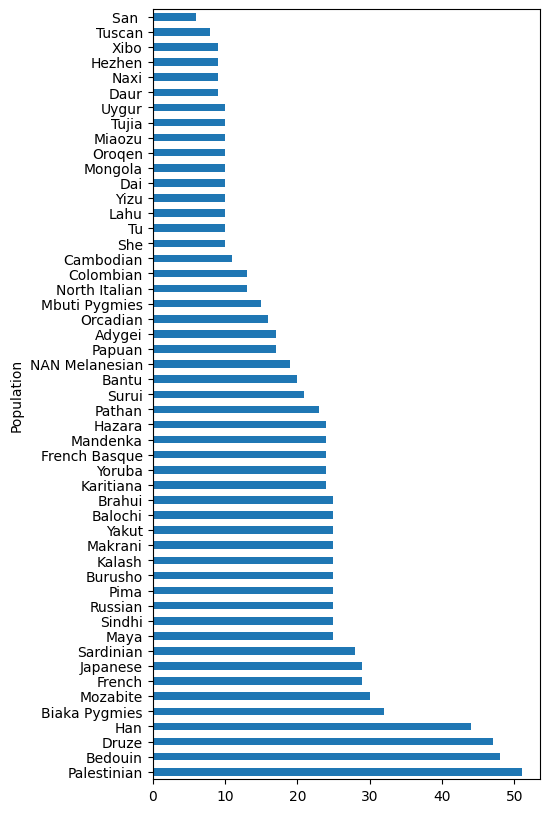

In [88]:
df_info['Population'].value_counts().plot.barh(figsize=(5,10))

<Axes: ylabel='Geographic Origin'>

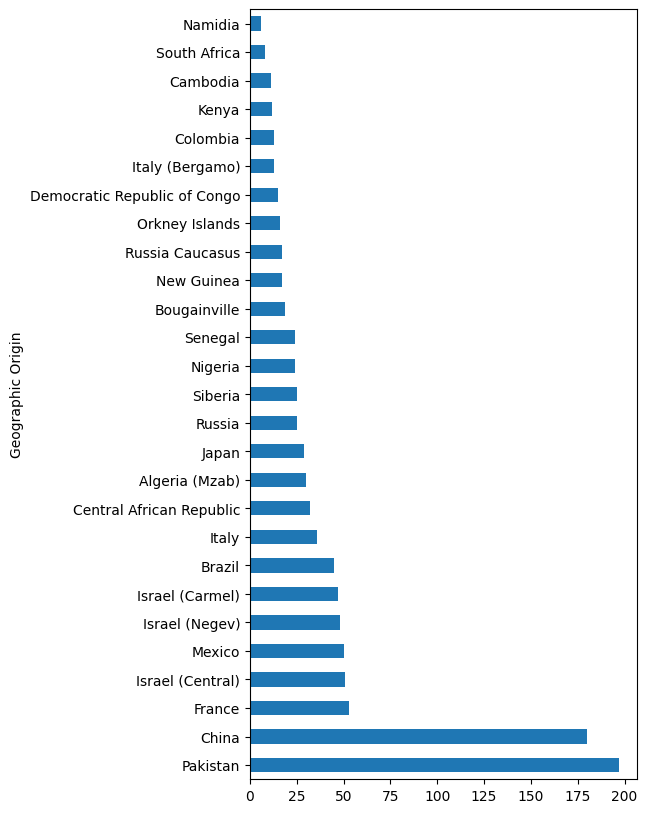

In [90]:
df_info['Geographic Origin'].value_counts().plot.barh(figsize=(5,10))

<Axes: ylabel='Geographic Area'>

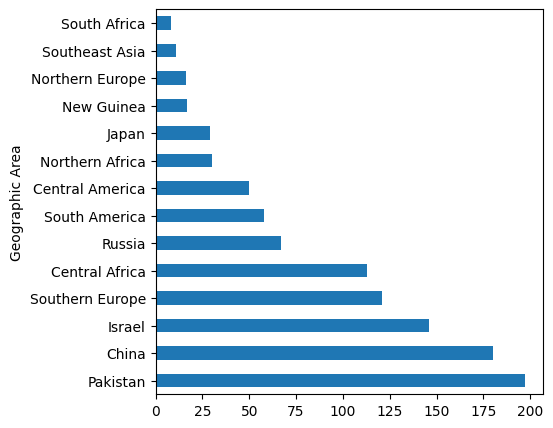

In [84]:
df_info['Geographic Area'].value_counts().plot.barh(figsize=(5,5))

<Axes: ylabel='Region'>

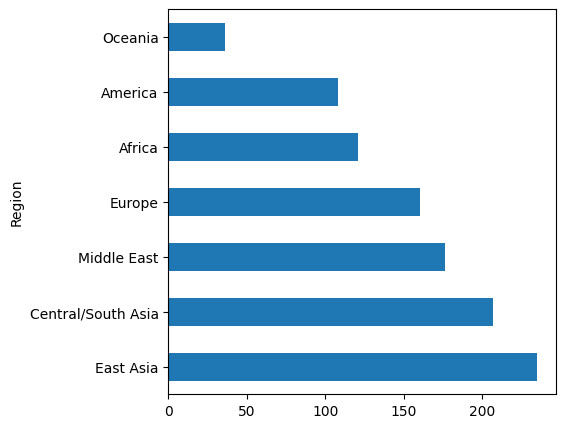

In [85]:
df_info['Region'].value_counts().plot.barh(figsize=(5,5))

In [97]:
population_list = df_info["Population"].unique()
origin_list = df_info['Geographic Origin'].unique()
area_list = df_info['Geographic Area'].unique()
region_list = df_info['Region'].unique()

In [91]:
train_data = df_snp.values[:,3:].T

## PCA

In [98]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy

In [164]:
def plot_result(data_result, label_list, label_info, figsize=(10,10)):
    plt.figure(figsize=figsize,dpi=200)
    for i in label_list:
        plt.scatter(data_result[label_info == i, 0], data_result[label_info == i, 1], label=i)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend(bbox_to_anchor=(1, 1))
    plt.show()
    
def plot_all(data_result):
    plot_result(data_result, population_list, df_info['Population'], figsize=(14,14))
    plot_result(data_result, origin_list, df_info['Geographic Origin'])
    plot_result(data_result, area_list, df_info['Geographic Area'])
    plot_result(data_result, region_list, df_info['Region'])

In [251]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(train_data)

In [165]:
print(pca.explained_variance_ratio_)

[0.06705061 0.04853613]


In [166]:
print(pca.explained_variance_)

[11291.7055456   8173.76053842]


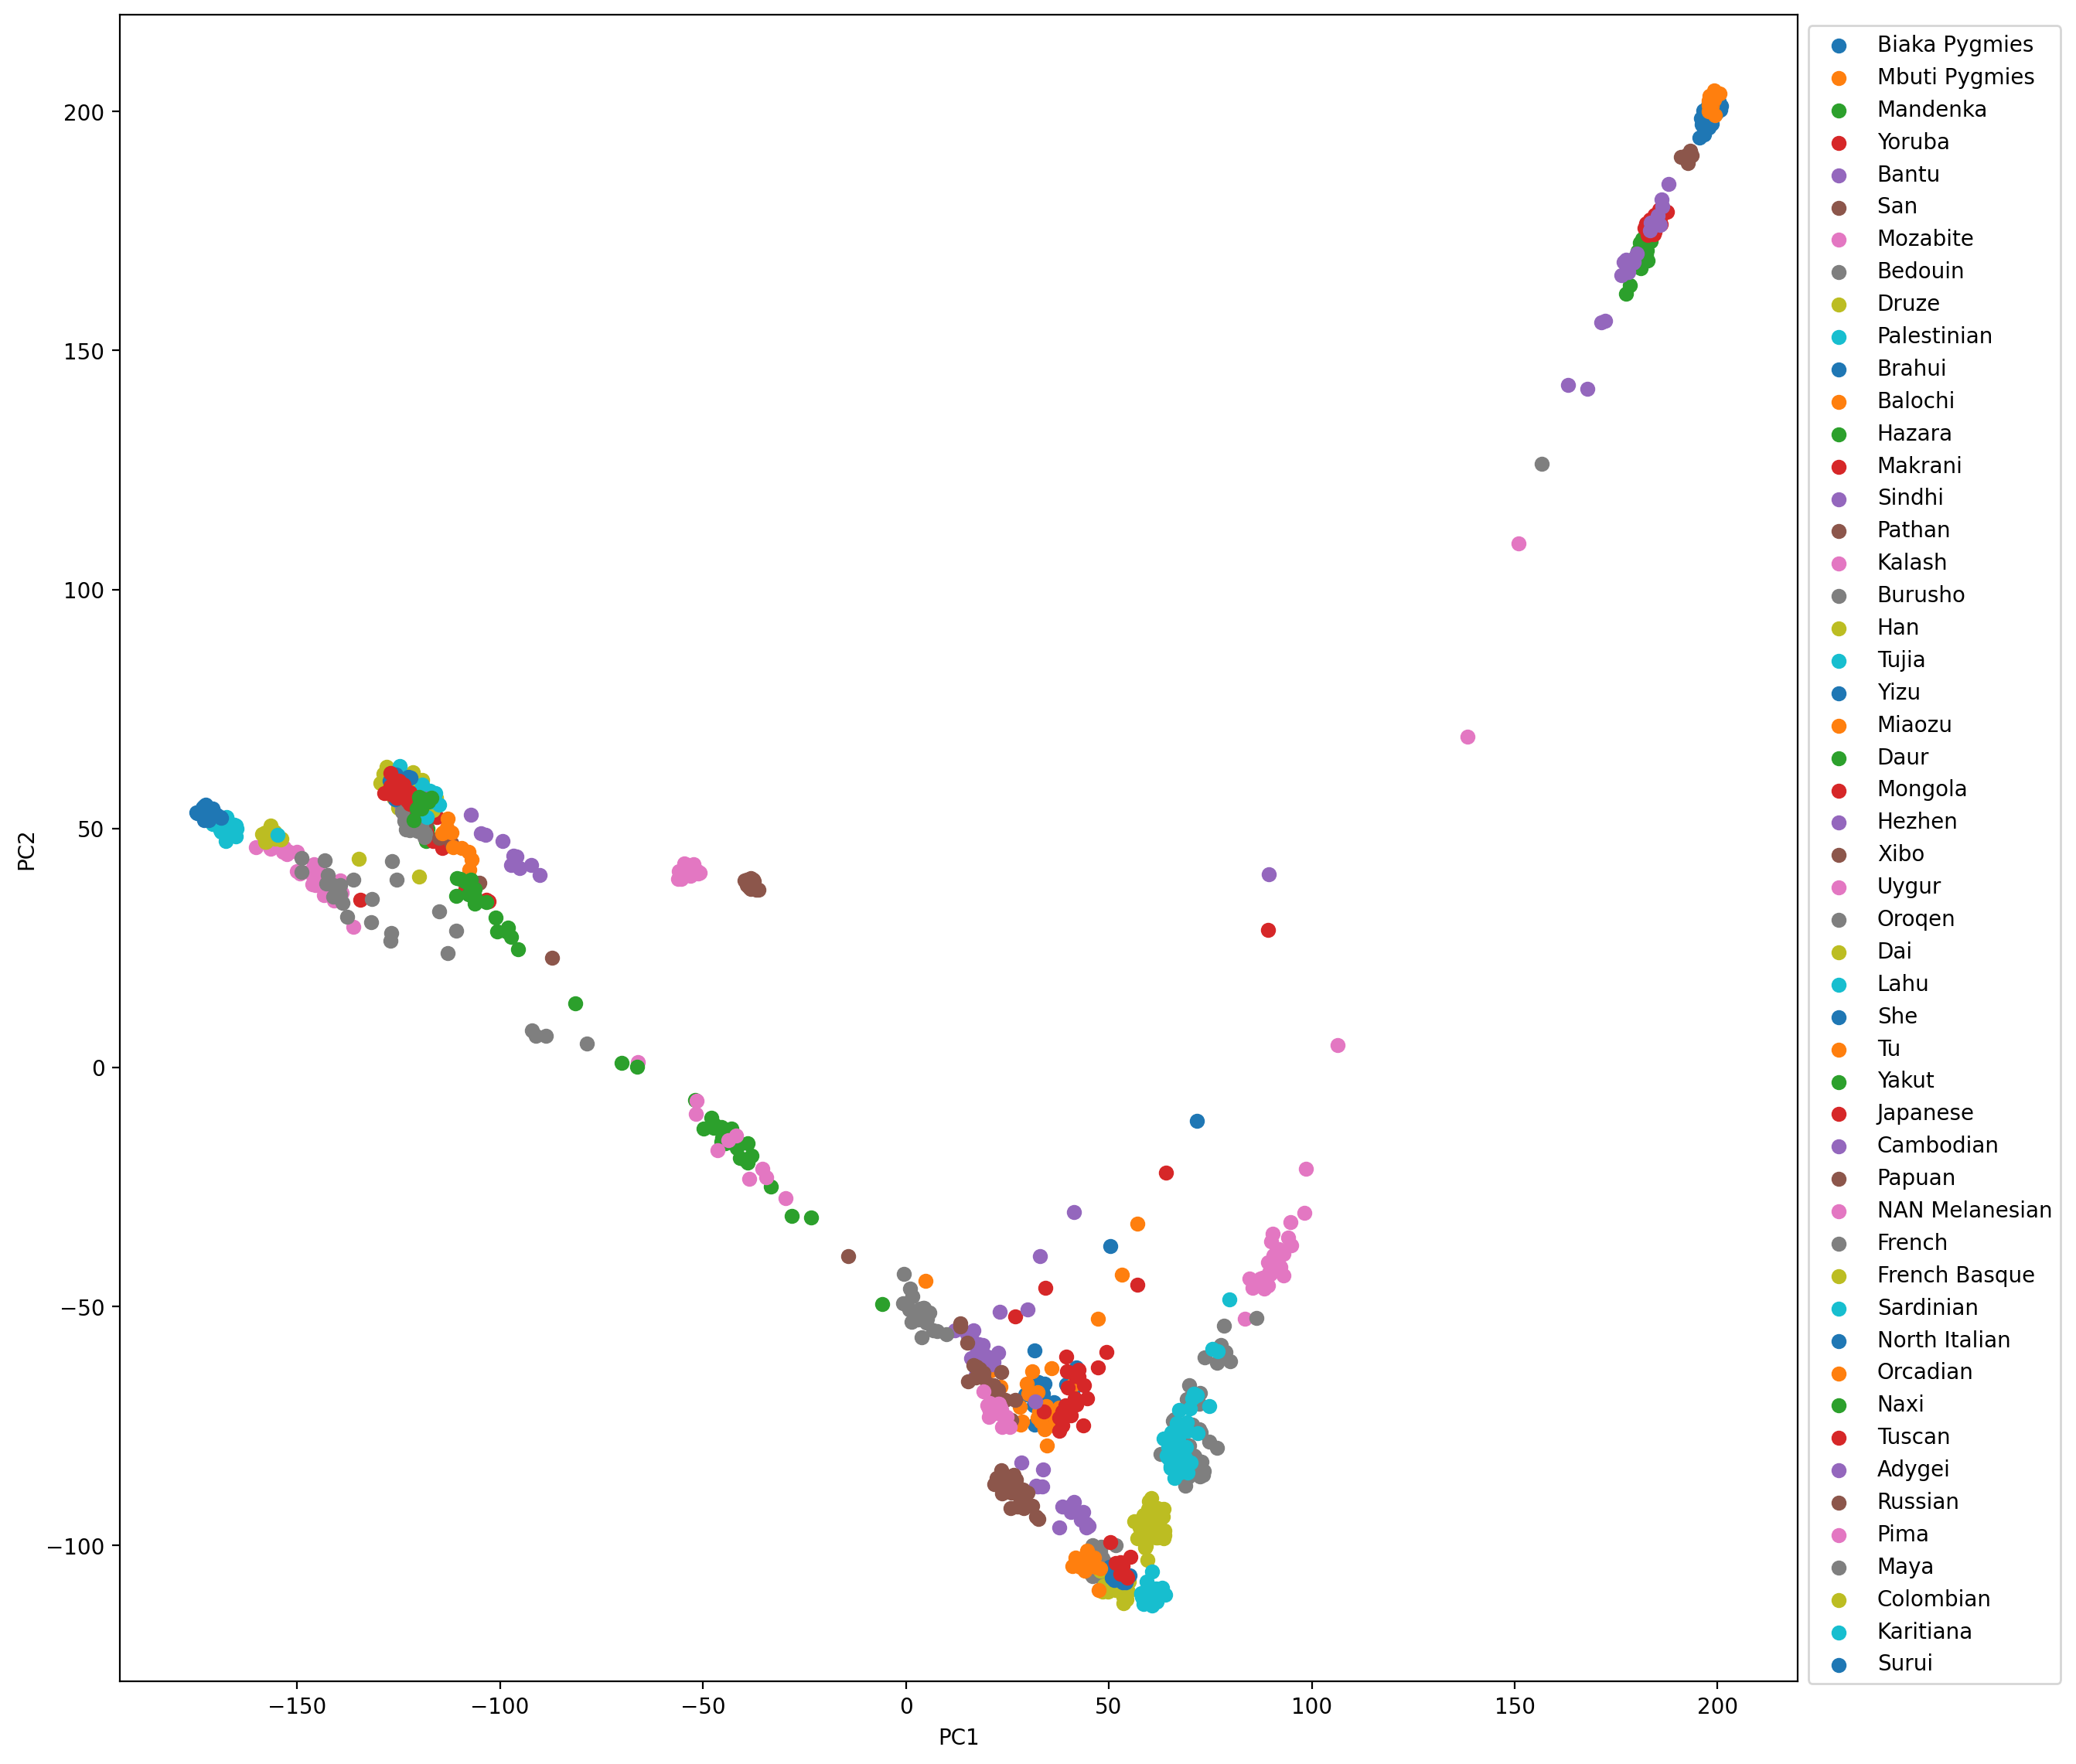

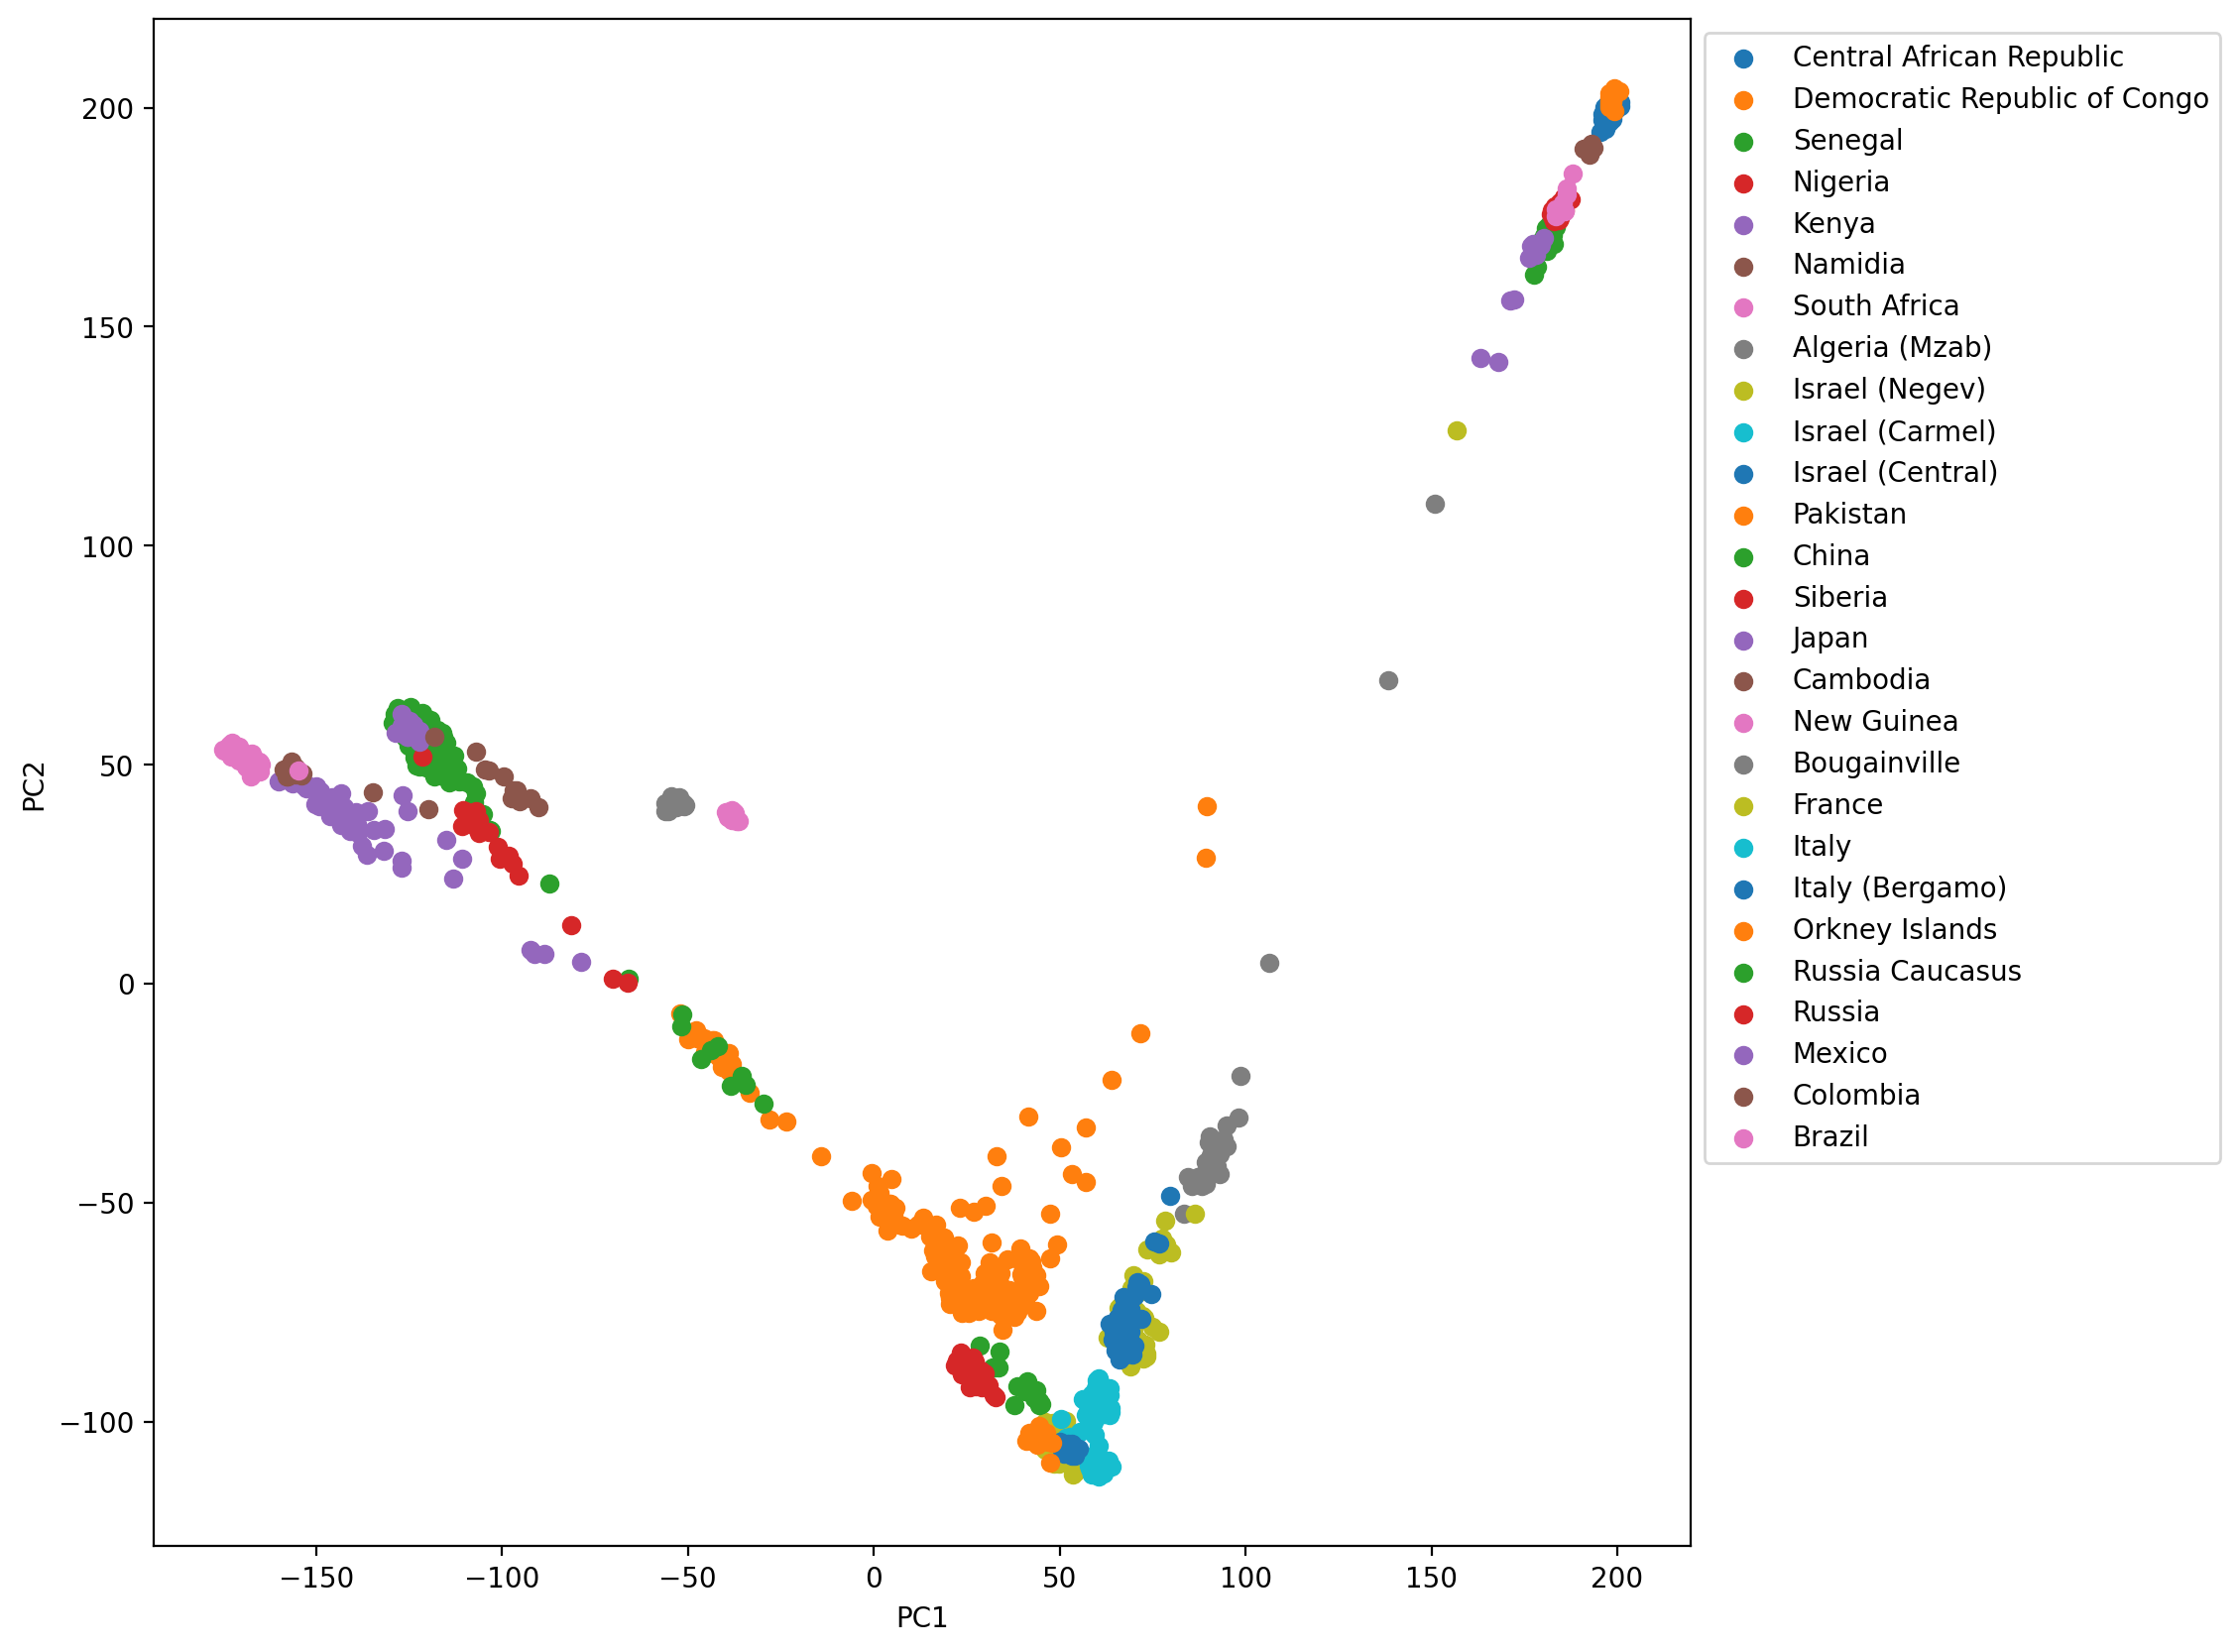

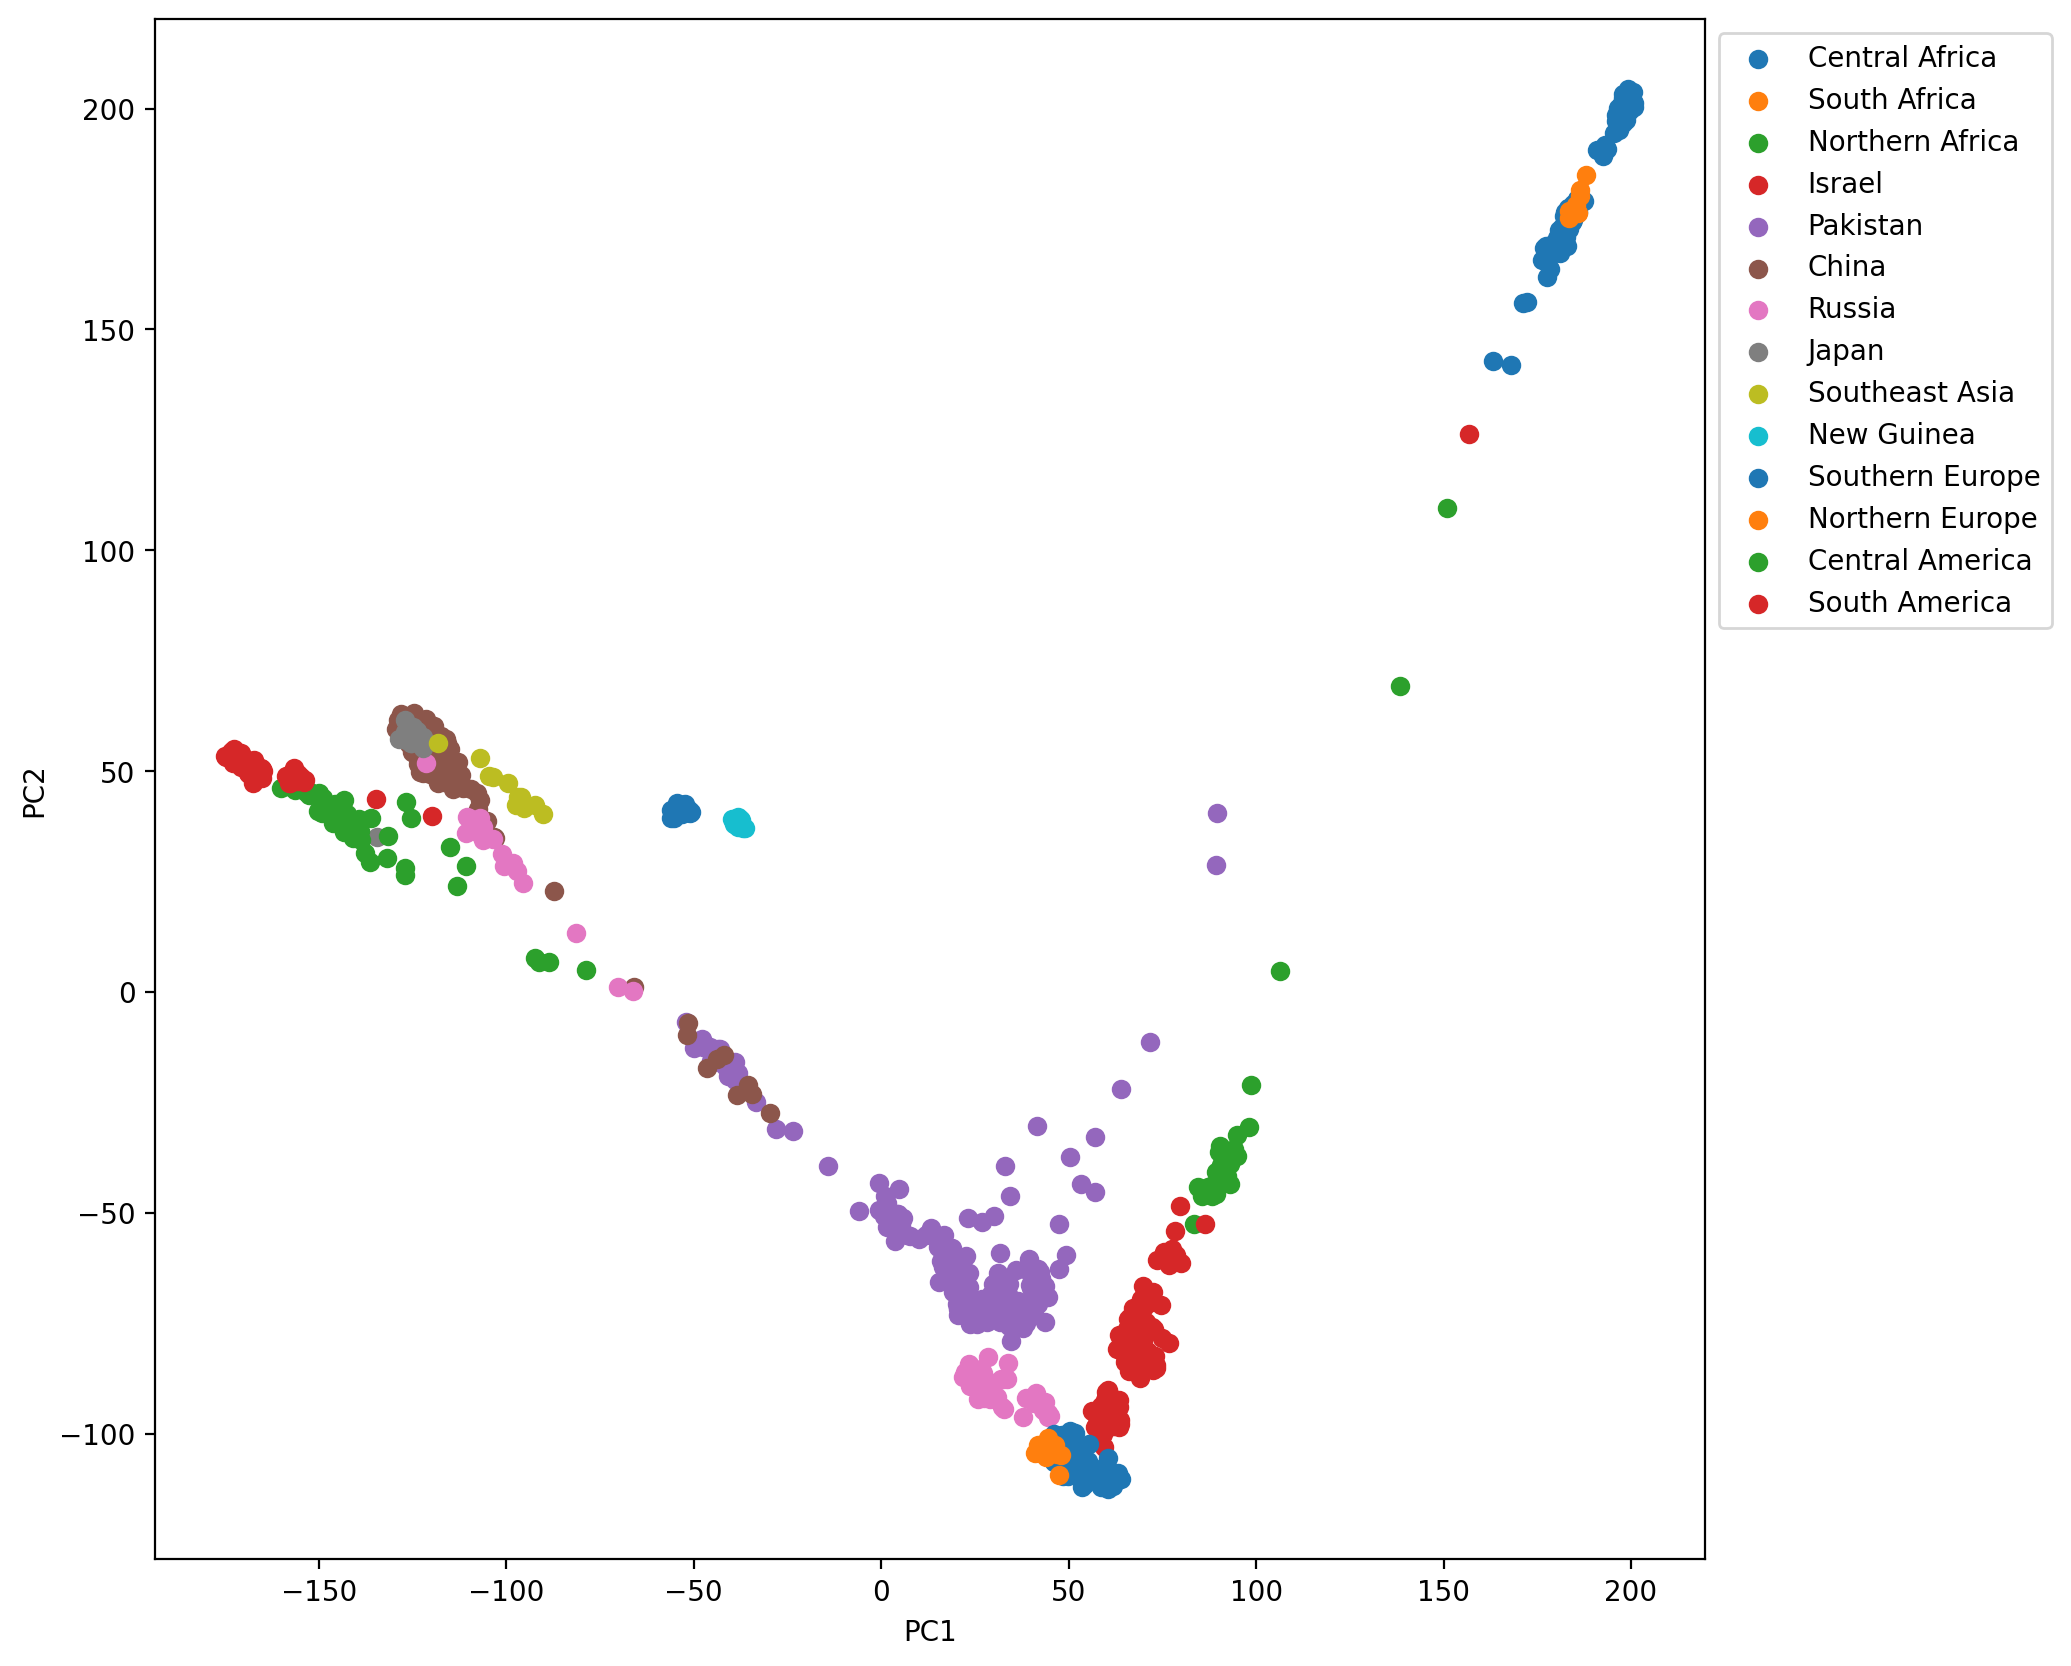

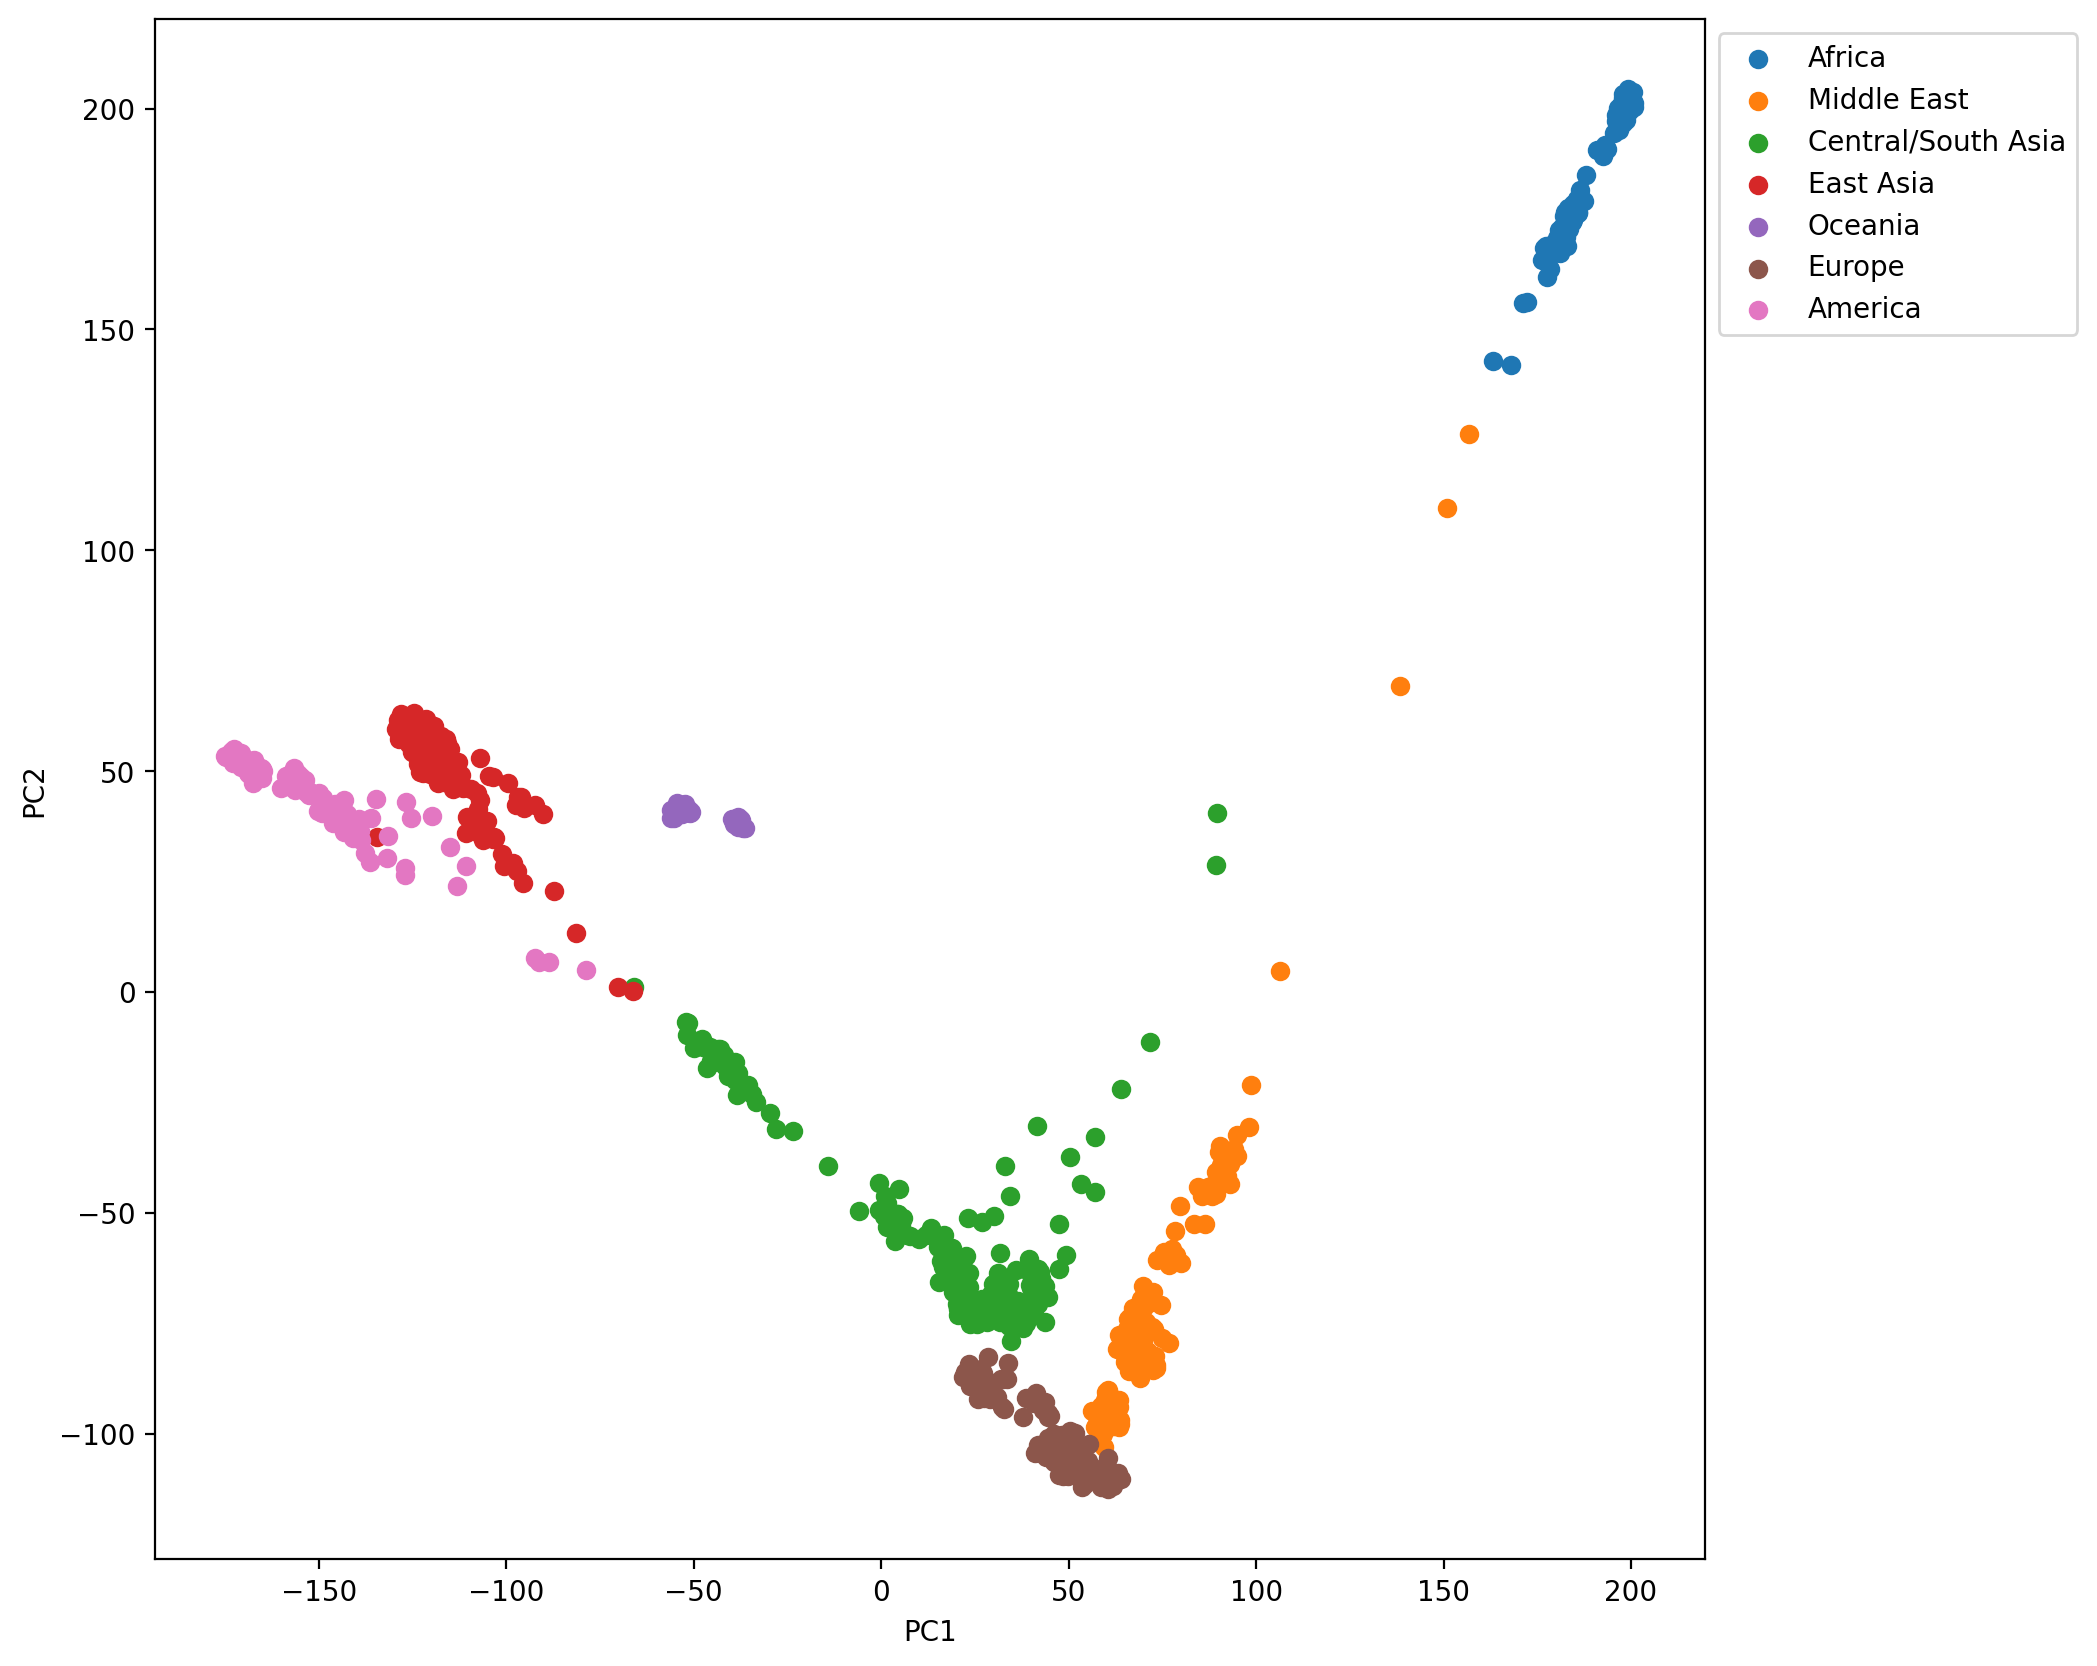

In [167]:
plot_all(pca_result)

### Visualization by K-Means

In [171]:
from time import time
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


def bench_k_means(kmeans, name, data, labels):
    t0 = time()
    estimator = make_pipeline(StandardScaler(), kmeans).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(
            data,
            estimator[-1].labels_,
            metric="euclidean",
            sample_size=300,
        )
    ]

    # Show the results
    formatter_result = (
        "{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
    )
    print(formatter_result.format(*results))

In [175]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

def get_benchmark(group_number, train_data, labels):
    print(82 * "_")
    print("init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")

    kmeans = KMeans(init="k-means++", n_clusters=group_number, n_init=4, random_state=0)
    bench_k_means(kmeans=kmeans, name="k-means++", data=train_data, labels=labels)

    kmeans = KMeans(init="random", n_clusters=group_number, n_init=4, random_state=0)
    bench_k_means(kmeans=kmeans, name="random", data=train_data, labels=labels)

    pca = PCA(n_components=group_number).fit(train_data)
    kmeans = KMeans(init=pca.components_, n_clusters=group_number, n_init=1)
    bench_k_means(kmeans=kmeans, name="PCA-based", data=train_data, labels=labels)

    print(82 * "_")

In [176]:
import numpy as np
import matplotlib.pyplot as plt

def get_plot(group_number, train_data):
    reduced_data = PCA(n_components=2).fit_transform(train_data)
    kmeans = KMeans(init="k-means++", n_clusters=group_number, n_init=4)
    kmeans.fit(reduced_data)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(10,10))
    plt.clf()
    plt.imshow(
        Z,
        interpolation="nearest",
        extent=(xx.min(), xx.max(), yy.min(), yy.max()),
        cmap=plt.cm.Paired,
        aspect="auto",
        origin="lower",
    )

    plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
    # Plot the centroids as a white X
    centroids = kmeans.cluster_centers_
    plt.scatter(
        centroids[:, 0],
        centroids[:, 1],
        marker="x",
        s=169,
        linewidths=3,
        color="w",
        zorder=10,
    )
    plt.title(
        "K-means clustering on the SNP dataset (PCA-reduced data)\n"
        "Centroids are marked with white cross"
    )
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

Population
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	118.948s	394550031	0.711	0.809	0.757	0.356	0.685	0.013
random   	38.580s	402278287	0.697	0.779	0.736	0.373	0.662	0.014
PCA-based	32.365s	403021861	0.553	0.844	0.669	0.205	0.605	0.017
__________________________________________________________________________________


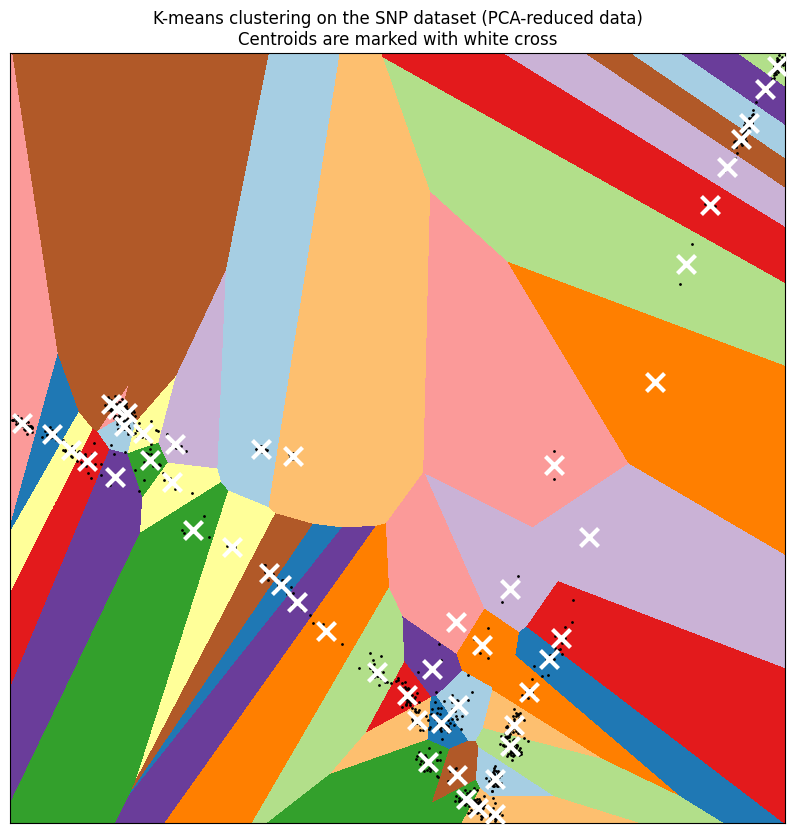

Geographic Origin
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	73.120s	411992488	0.768	0.784	0.776	0.520	0.750	0.016
random   	37.232s	417509089	0.730	0.724	0.727	0.396	0.696	0.016
PCA-based	33.109s	418334068	0.628	0.847	0.722	0.533	0.697	0.015
__________________________________________________________________________________


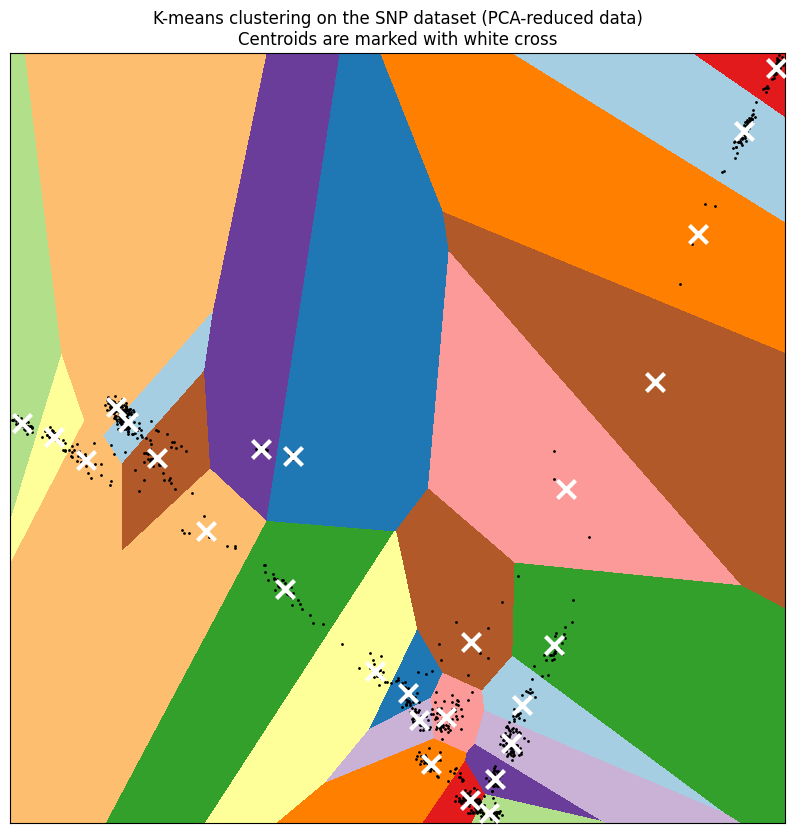

Geographic Area
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	53.660s	423418350	0.753	0.803	0.777	0.679	0.769	0.018
random   	37.137s	427561180	0.748	0.785	0.766	0.637	0.758	0.038
PCA-based	31.365s	430812793	0.563	0.801	0.661	0.395	0.649	0.015
__________________________________________________________________________________


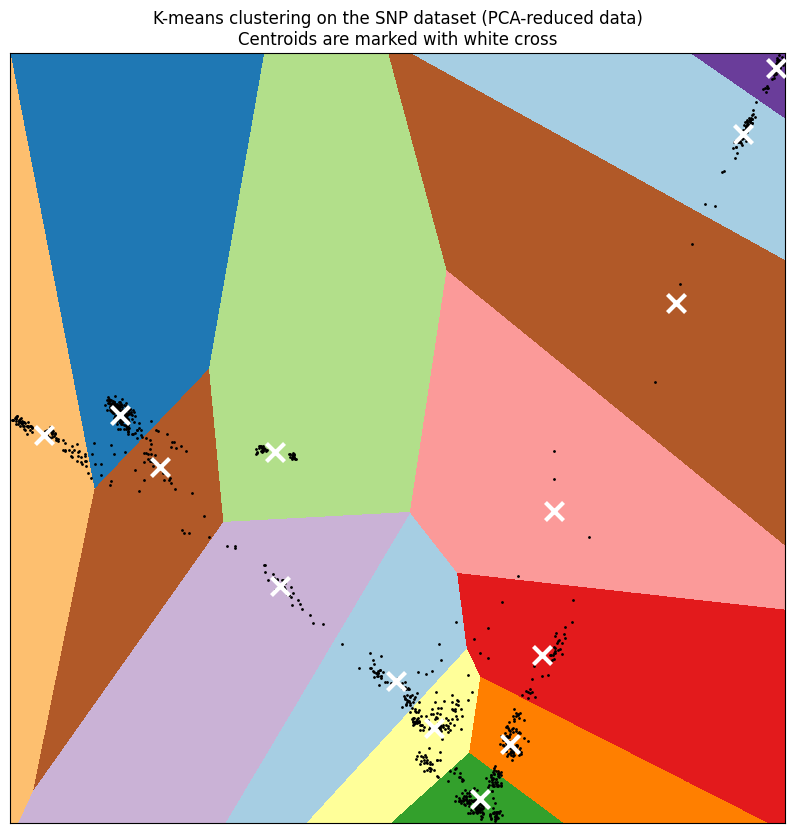

Region
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	44.100s	433940492	0.650	0.838	0.732	0.489	0.729	0.050
random   	32.722s	437167390	0.752	0.866	0.805	0.670	0.803	0.052
PCA-based	31.723s	436302818	0.649	0.884	0.748	0.510	0.746	0.063
__________________________________________________________________________________


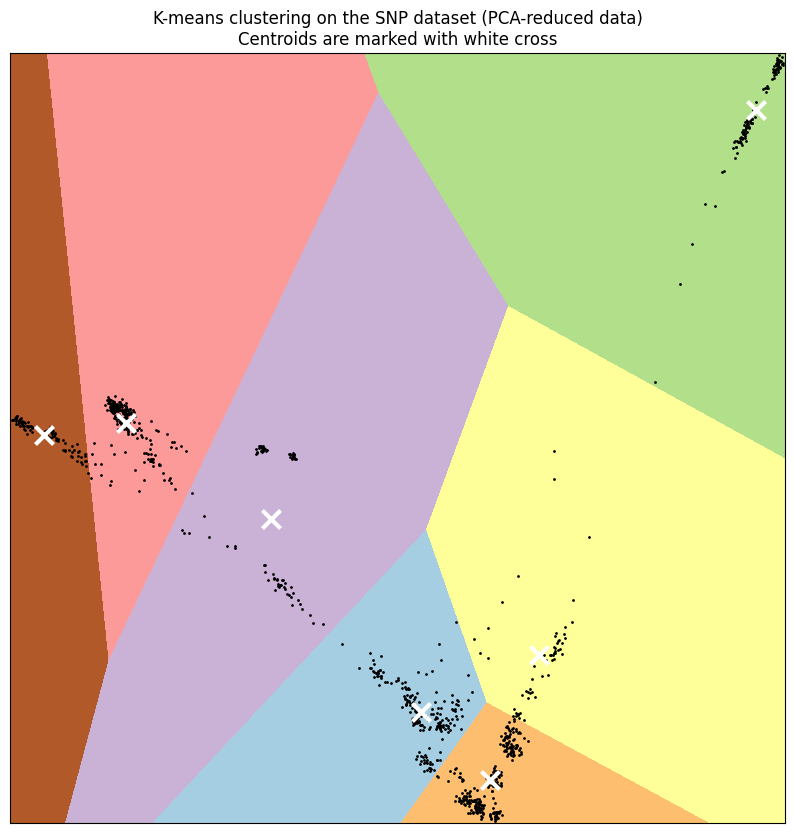

In [179]:
print("Population")
get_benchmark(len(population_list), train_data, df_info['Population'])
get_plot(len(population_list), train_data)
print("Geographic Origin")
get_benchmark(len(origin_list), train_data, df_info['Geographic Origin'])
get_plot(len(origin_list), train_data)
print("Geographic Area")
get_benchmark(len(area_list), train_data, df_info['Geographic Area'])
get_plot(len(area_list), train_data)
print("Region")
get_benchmark(len(region_list), train_data, df_info['Region'])
get_plot(len(region_list), train_data)

### Importance Analysis

In [208]:
df_snp_t = df_snp.T
df_snp_t.columns = df_snp["snp"]

In [216]:
def create_importance_dataframe(pca, original_num_df):

    # Change pcs components ndarray to a dataframe
    importance_df  = pandas.DataFrame(pca.components_)

    # Assign columns
    importance_df.columns  = original_num_df.columns

    # Change to absolute values
    importance_df =importance_df.apply(np.abs)

    # Transpose
    importance_df=importance_df.transpose()

    # Change column names again

    ## First get number of pcs
    num_pcs = importance_df.shape[1]

    ## Generate the new column names
    new_columns = [f'PC{i}' for i in range(1, num_pcs + 1)]

    ## Now rename
    importance_df.columns=new_columns

    # Return importance df
    return importance_df

In [252]:
# Call function to create importance df
importance_df  = create_importance_dataframe(pca, df_snp_t)

# Show first few rows
display(importance_df.head())

PC1       PC2
snp                           
rs10000929  0.000798  0.000017
rs10002472  0.000032  0.000927
rs10005550  0.000684  0.001084
rs10007576  0.001555  0.002538
rs10007998  0.001407  0.003050

In [243]:
# Sort depending on PC of interest

## PC1 top 10 important features
pc1_top_10_features = importance_df['PC1'].sort_values(ascending = False)[:10]
print(), print(f'PC1 top 10 feautres are \n')
display(pc1_top_10_features )

## PC2 top 10 important features
pc2_top_10_features = importance_df['PC2'].sort_values(ascending = False)[:10]
print(), print(f'PC2 top 10 feautres are \n')
display(pc2_top_10_features)


PC1 top 10 feautres are 



snp
rs4918664     0.006456
rs10882168    0.006414
rs7091054     0.006382
rs11187300    0.006330
rs7556886     0.006310
rs12220128    0.006276
rs6583859     0.006270
rs4918924     0.006171
rs1834619     0.006151
rs4578856     0.006119
Name: PC1, dtype: float64


PC2 top 10 feautres are 



snp
rs1834640     0.008321
rs2250072     0.007733
rs260714      0.006920
rs10760260    0.006734
rs7531501     0.006731
rs2416899     0.006722
rs11637235    0.006701
rs618746      0.006655
rs595961      0.006609
rs10886189    0.006580
Name: PC2, dtype: float64

In [244]:
len(list(set(pc1_top_10_features.index) & set(pc2_top_10_features.index)))

0

<Axes: ylabel='Frequency'>

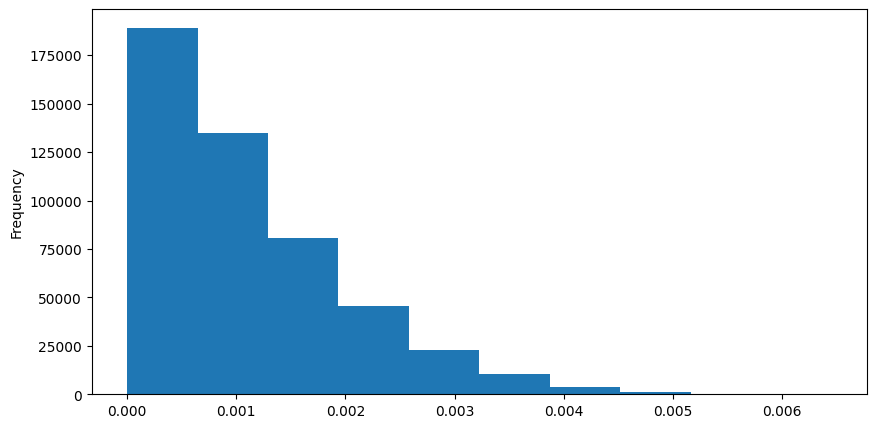

In [221]:
importance_df["PC1"].plot.hist(figsize=(10,5))

<Axes: ylabel='Frequency'>

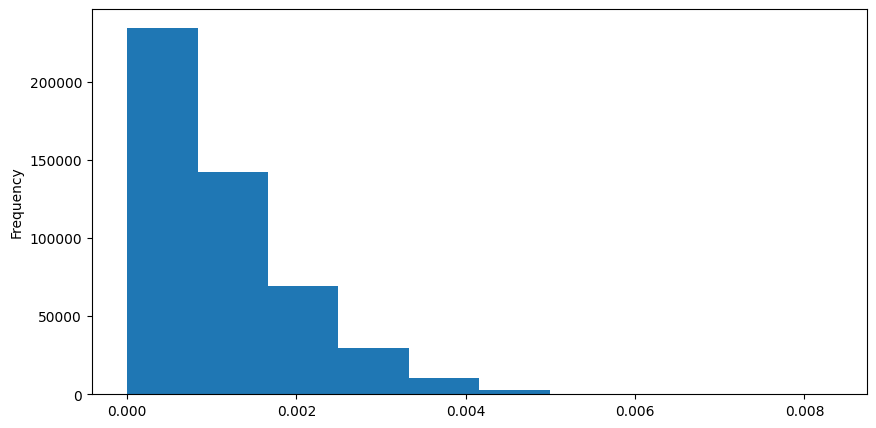

In [222]:
importance_df["PC2"].plot.hist(figsize=(10,5))

### Optimal Components

In [ ]:
pca = PCA().fit(train_data)

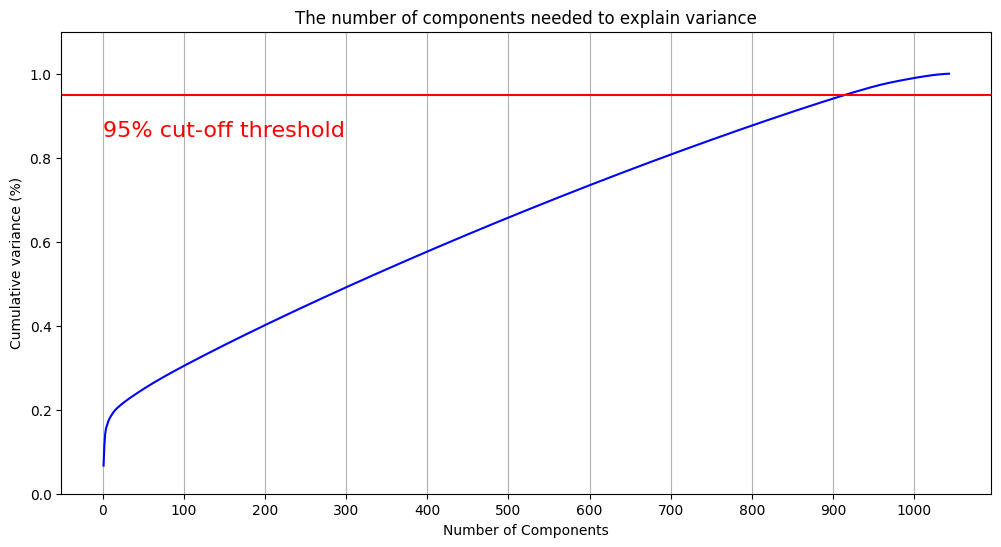

In [190]:
import math
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()

y = np.cumsum(pca.explained_variance_ratio_)
xi = np.arange(1, len(y)+1, step=1)

plt.ylim(0.0,1.1)
plt.plot(xi, y, color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, len(y), step=math.floor(len(y)/100)*10))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

## MDS

In [153]:
from sklearn.manifold import MDS

In [156]:
mds = MDS(n_components=2, normalized_stress=False)
mds_result = mds.fit_transform(train_data)

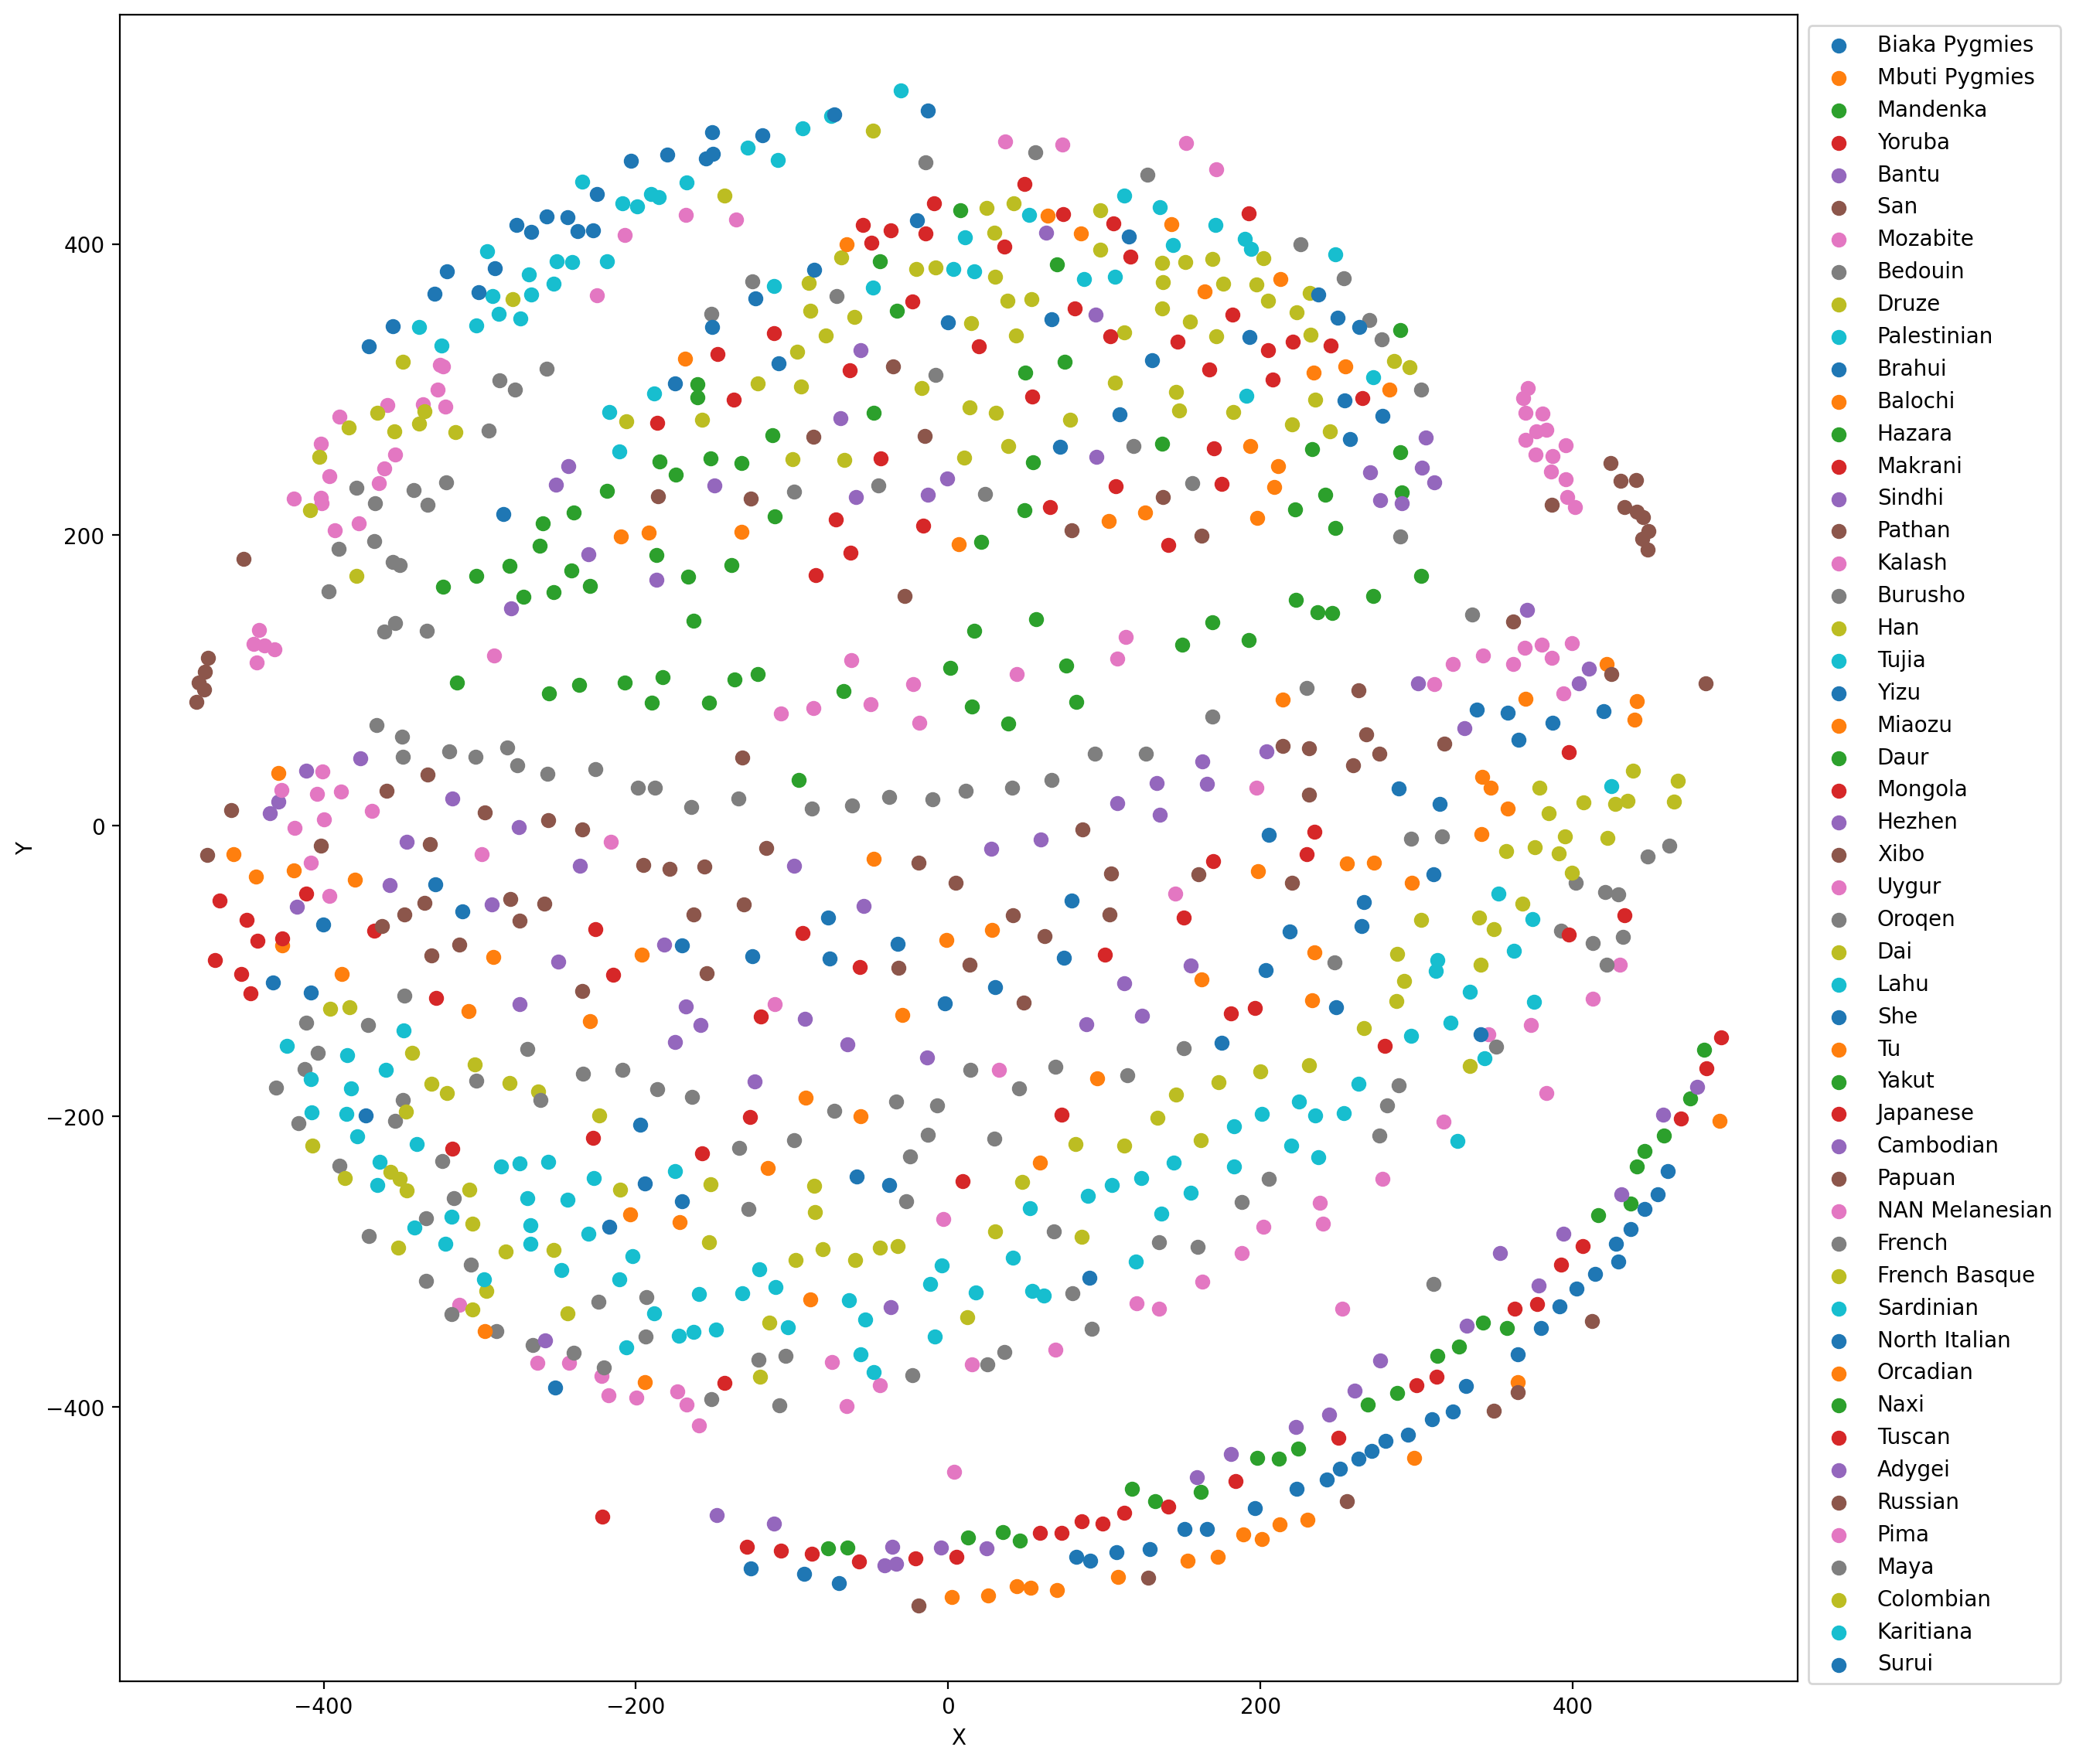

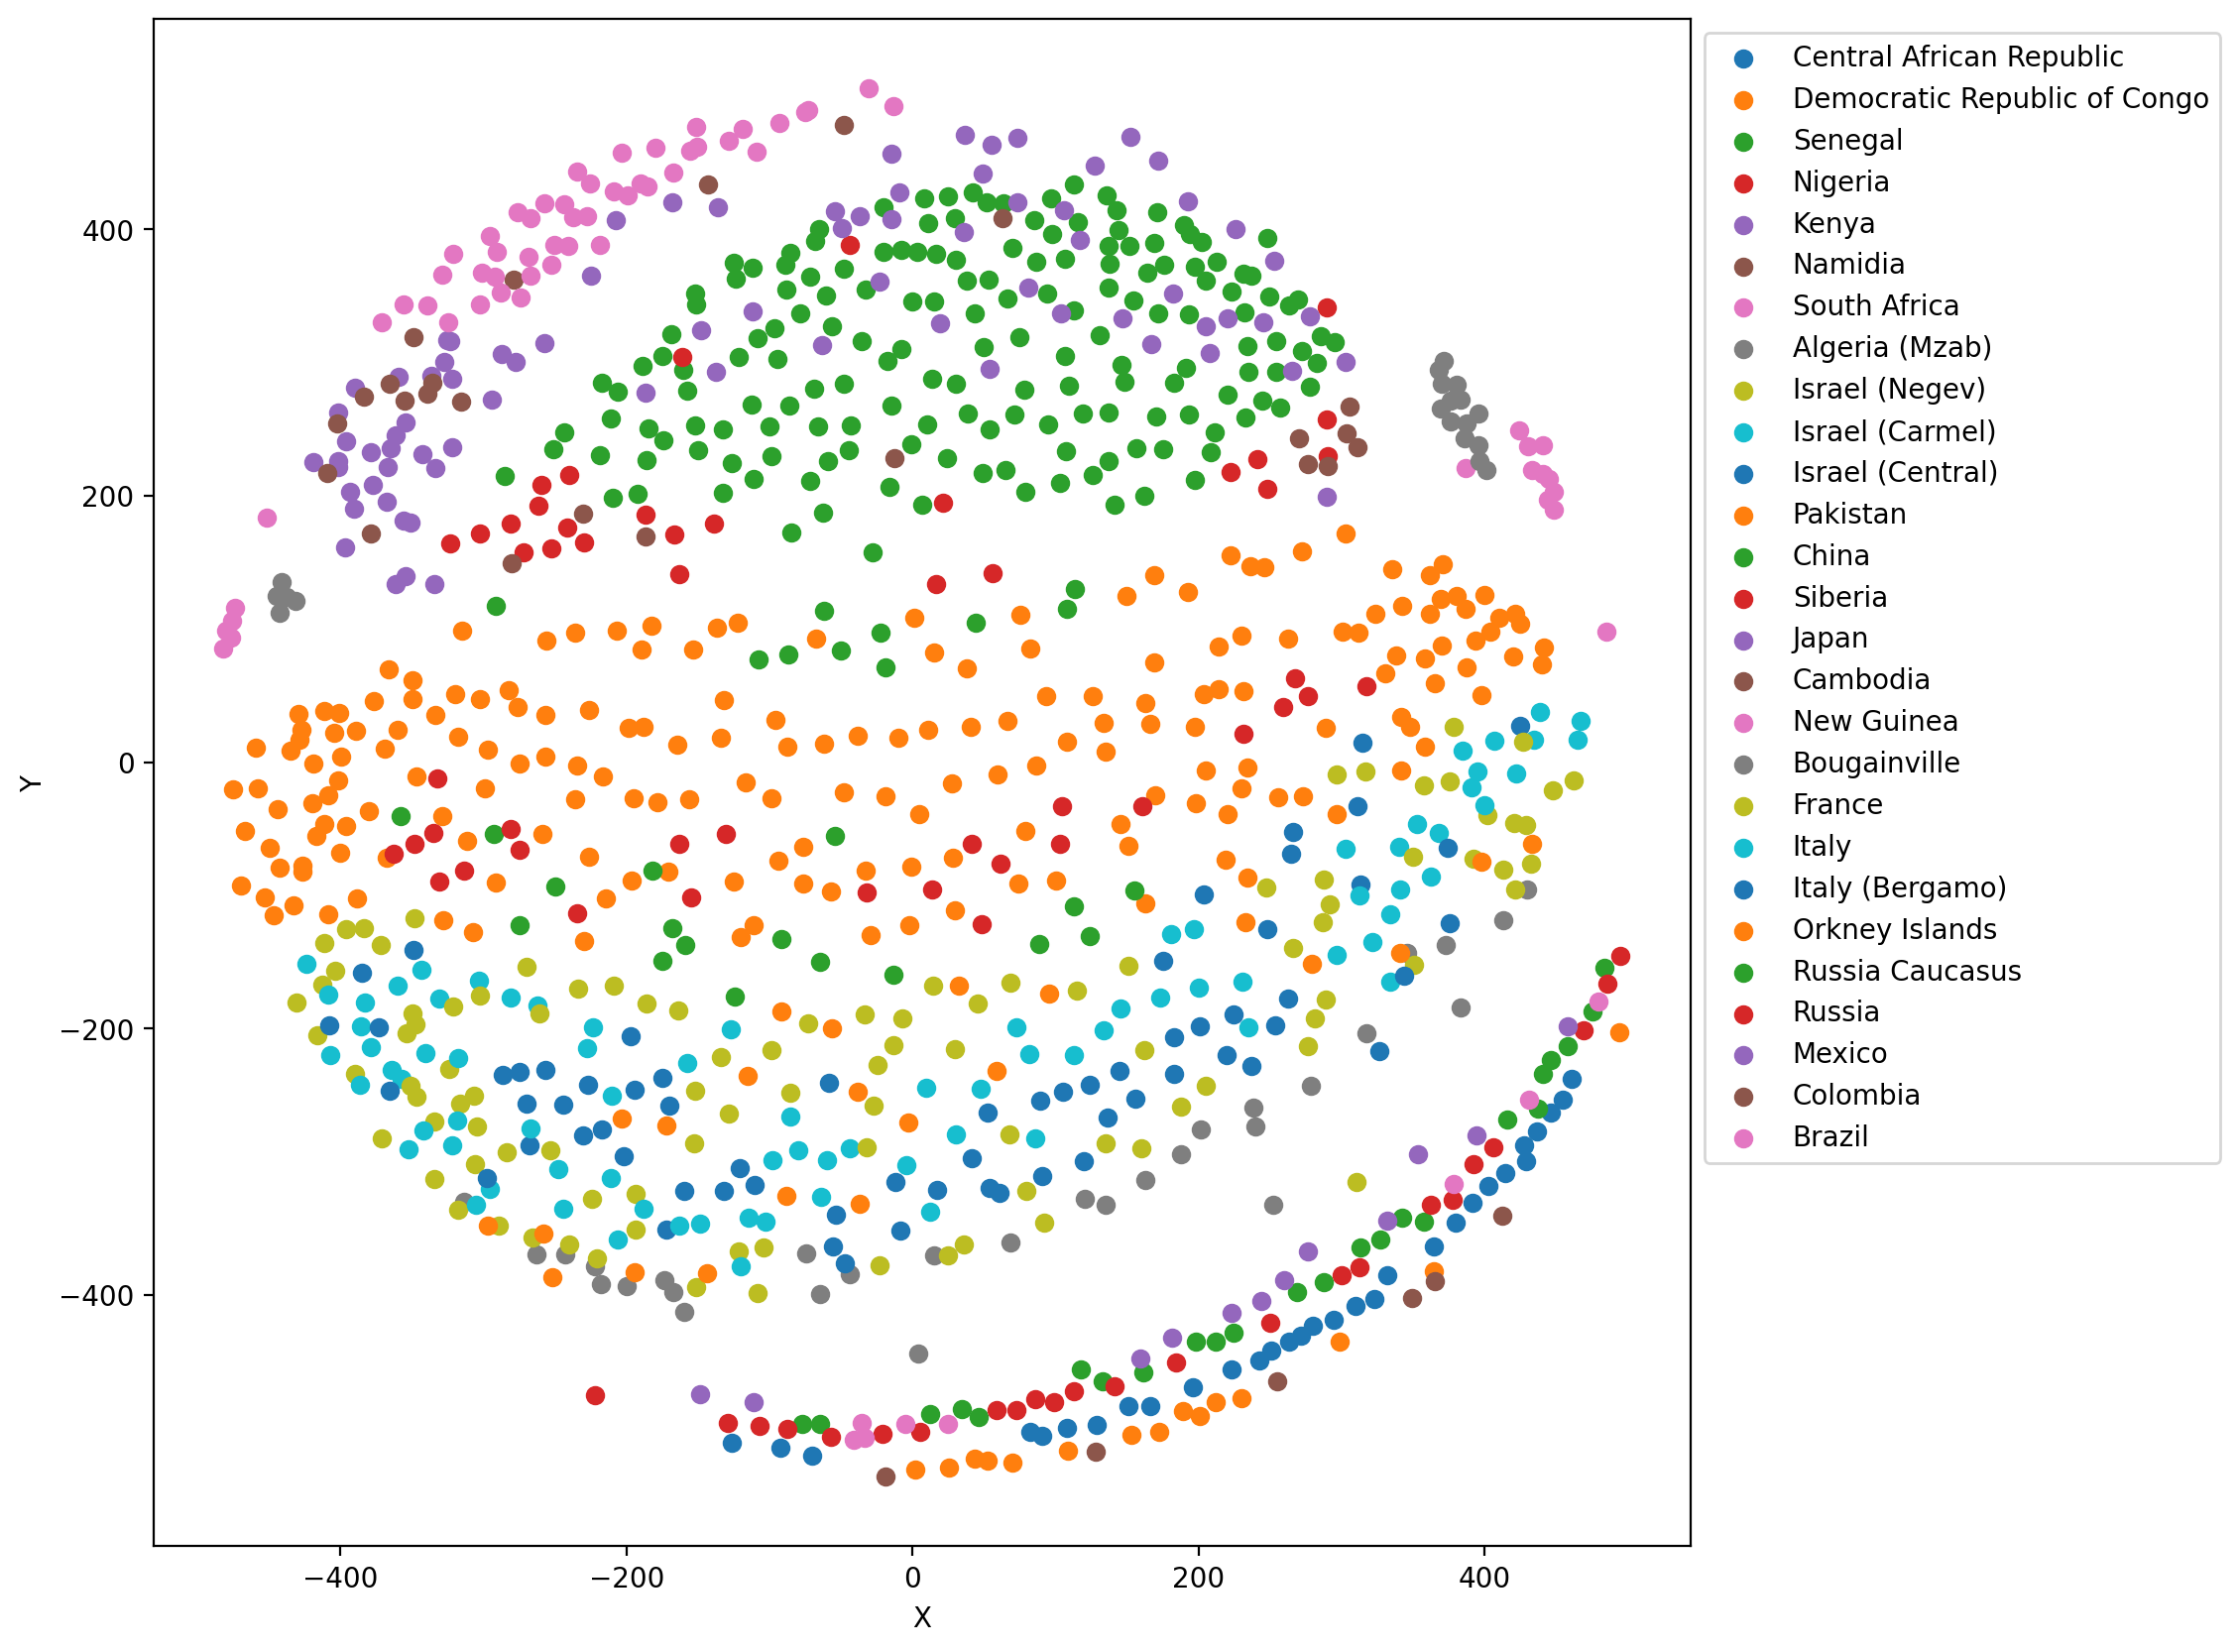

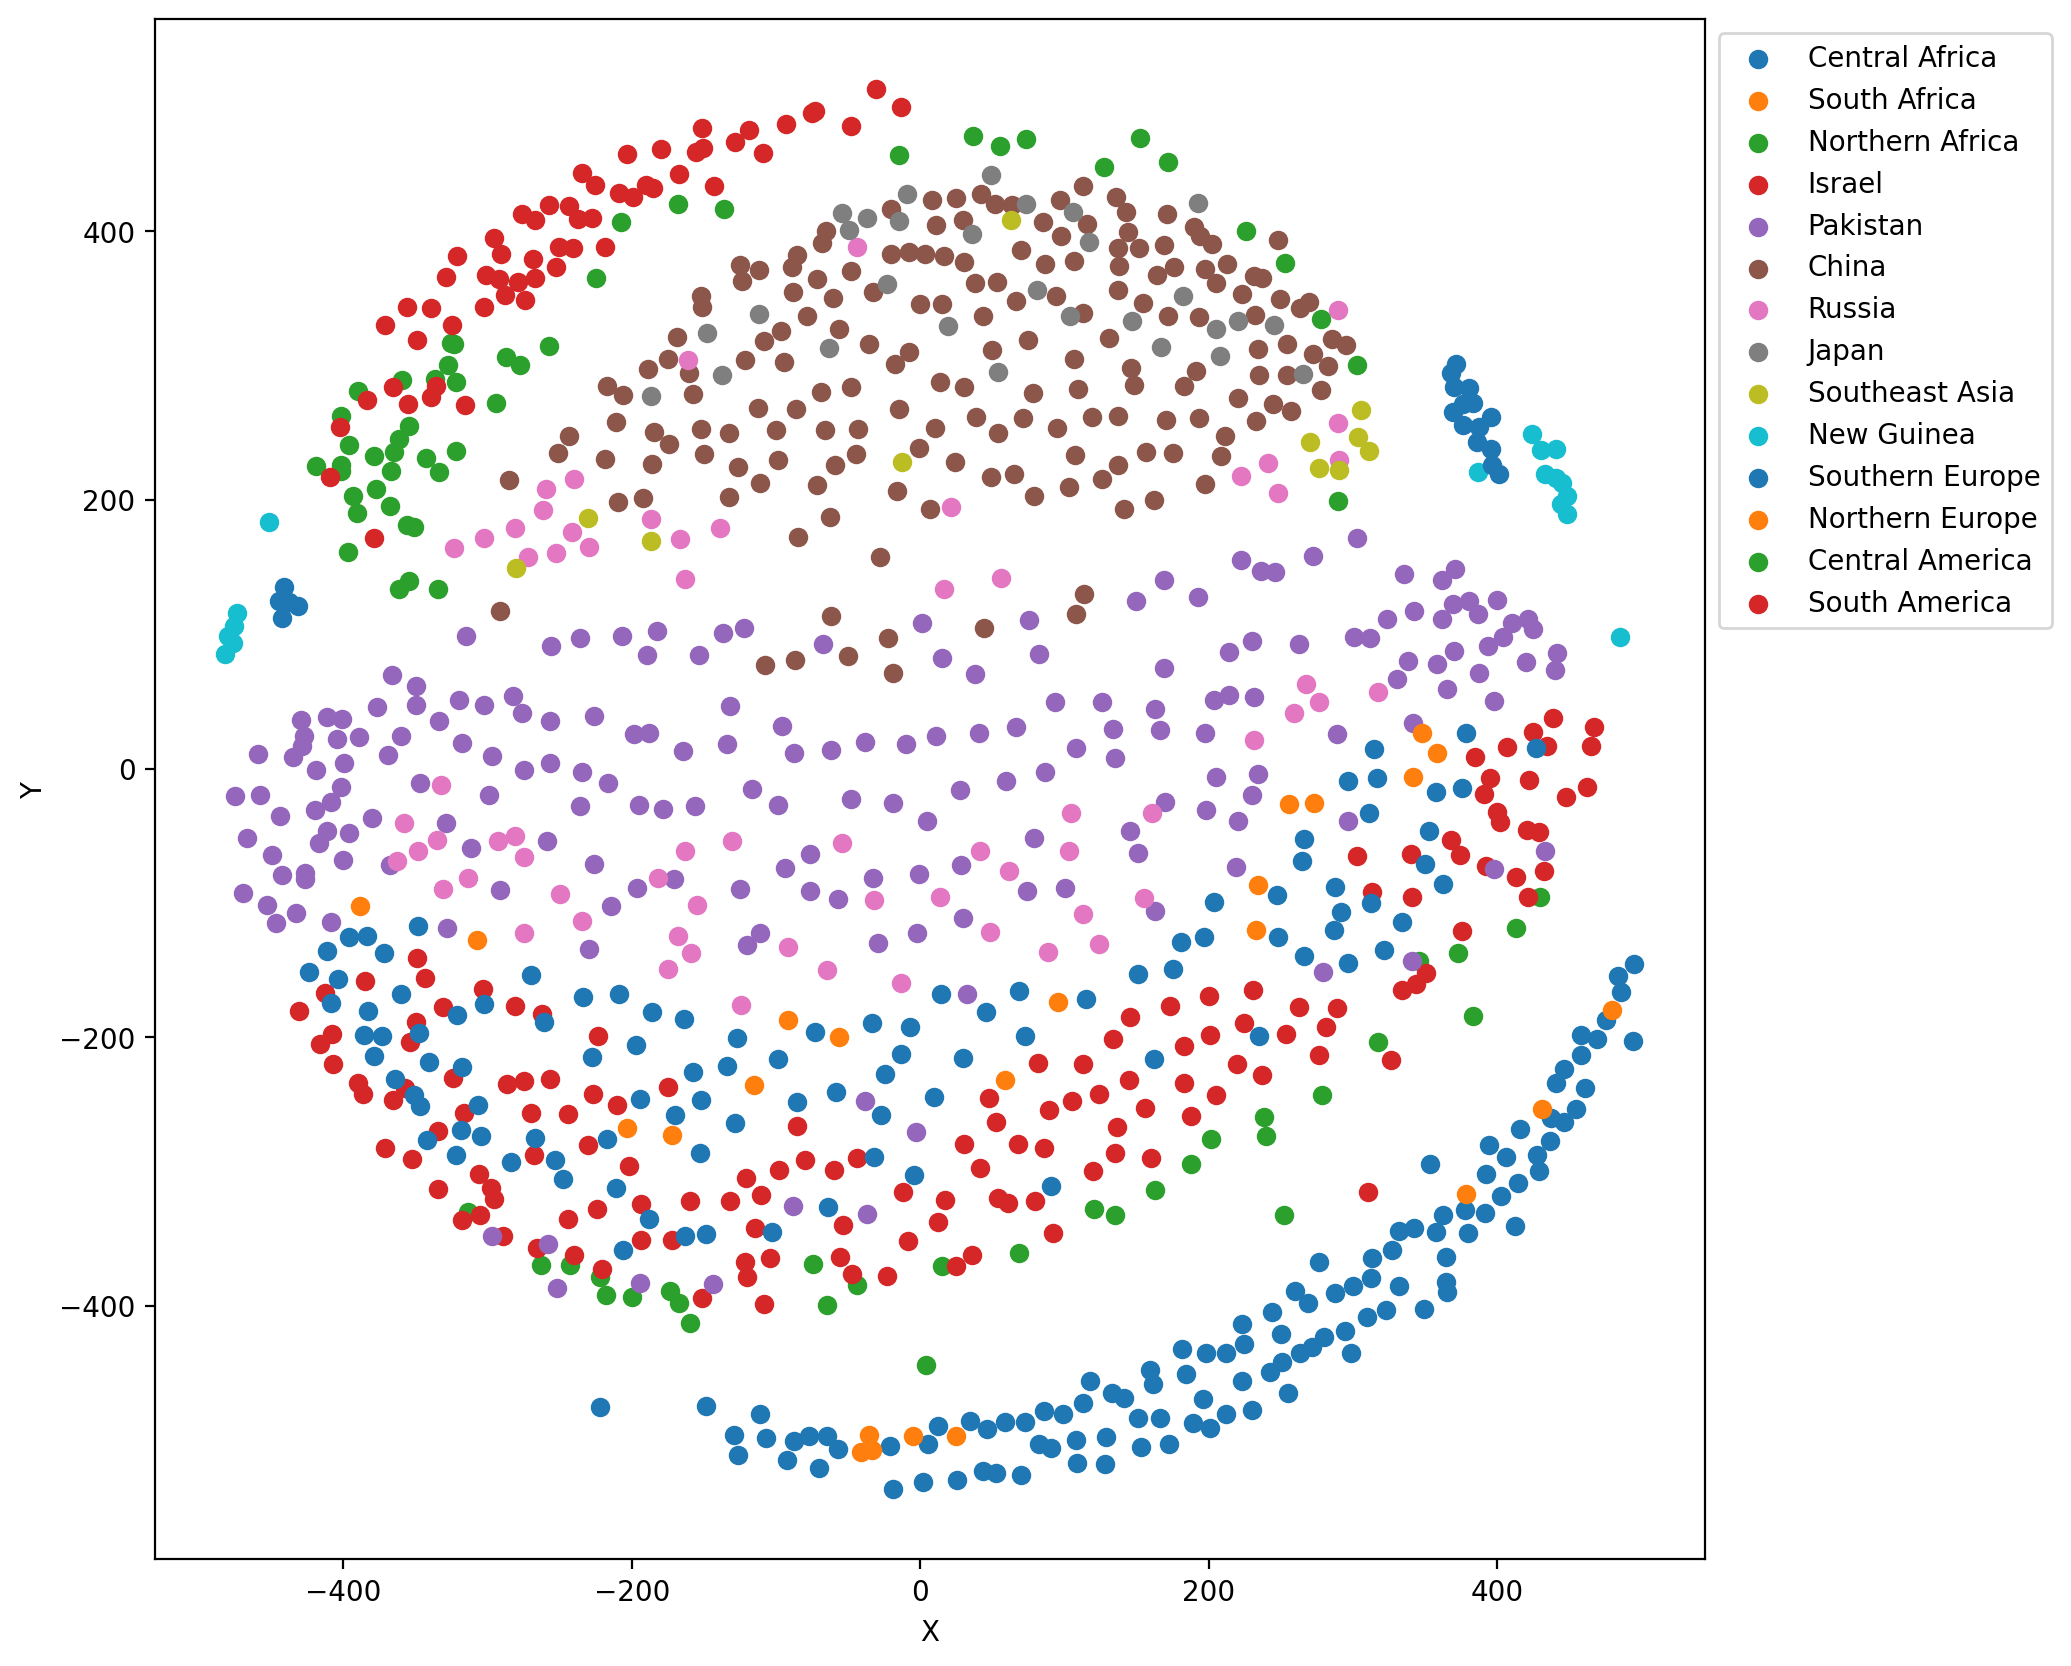

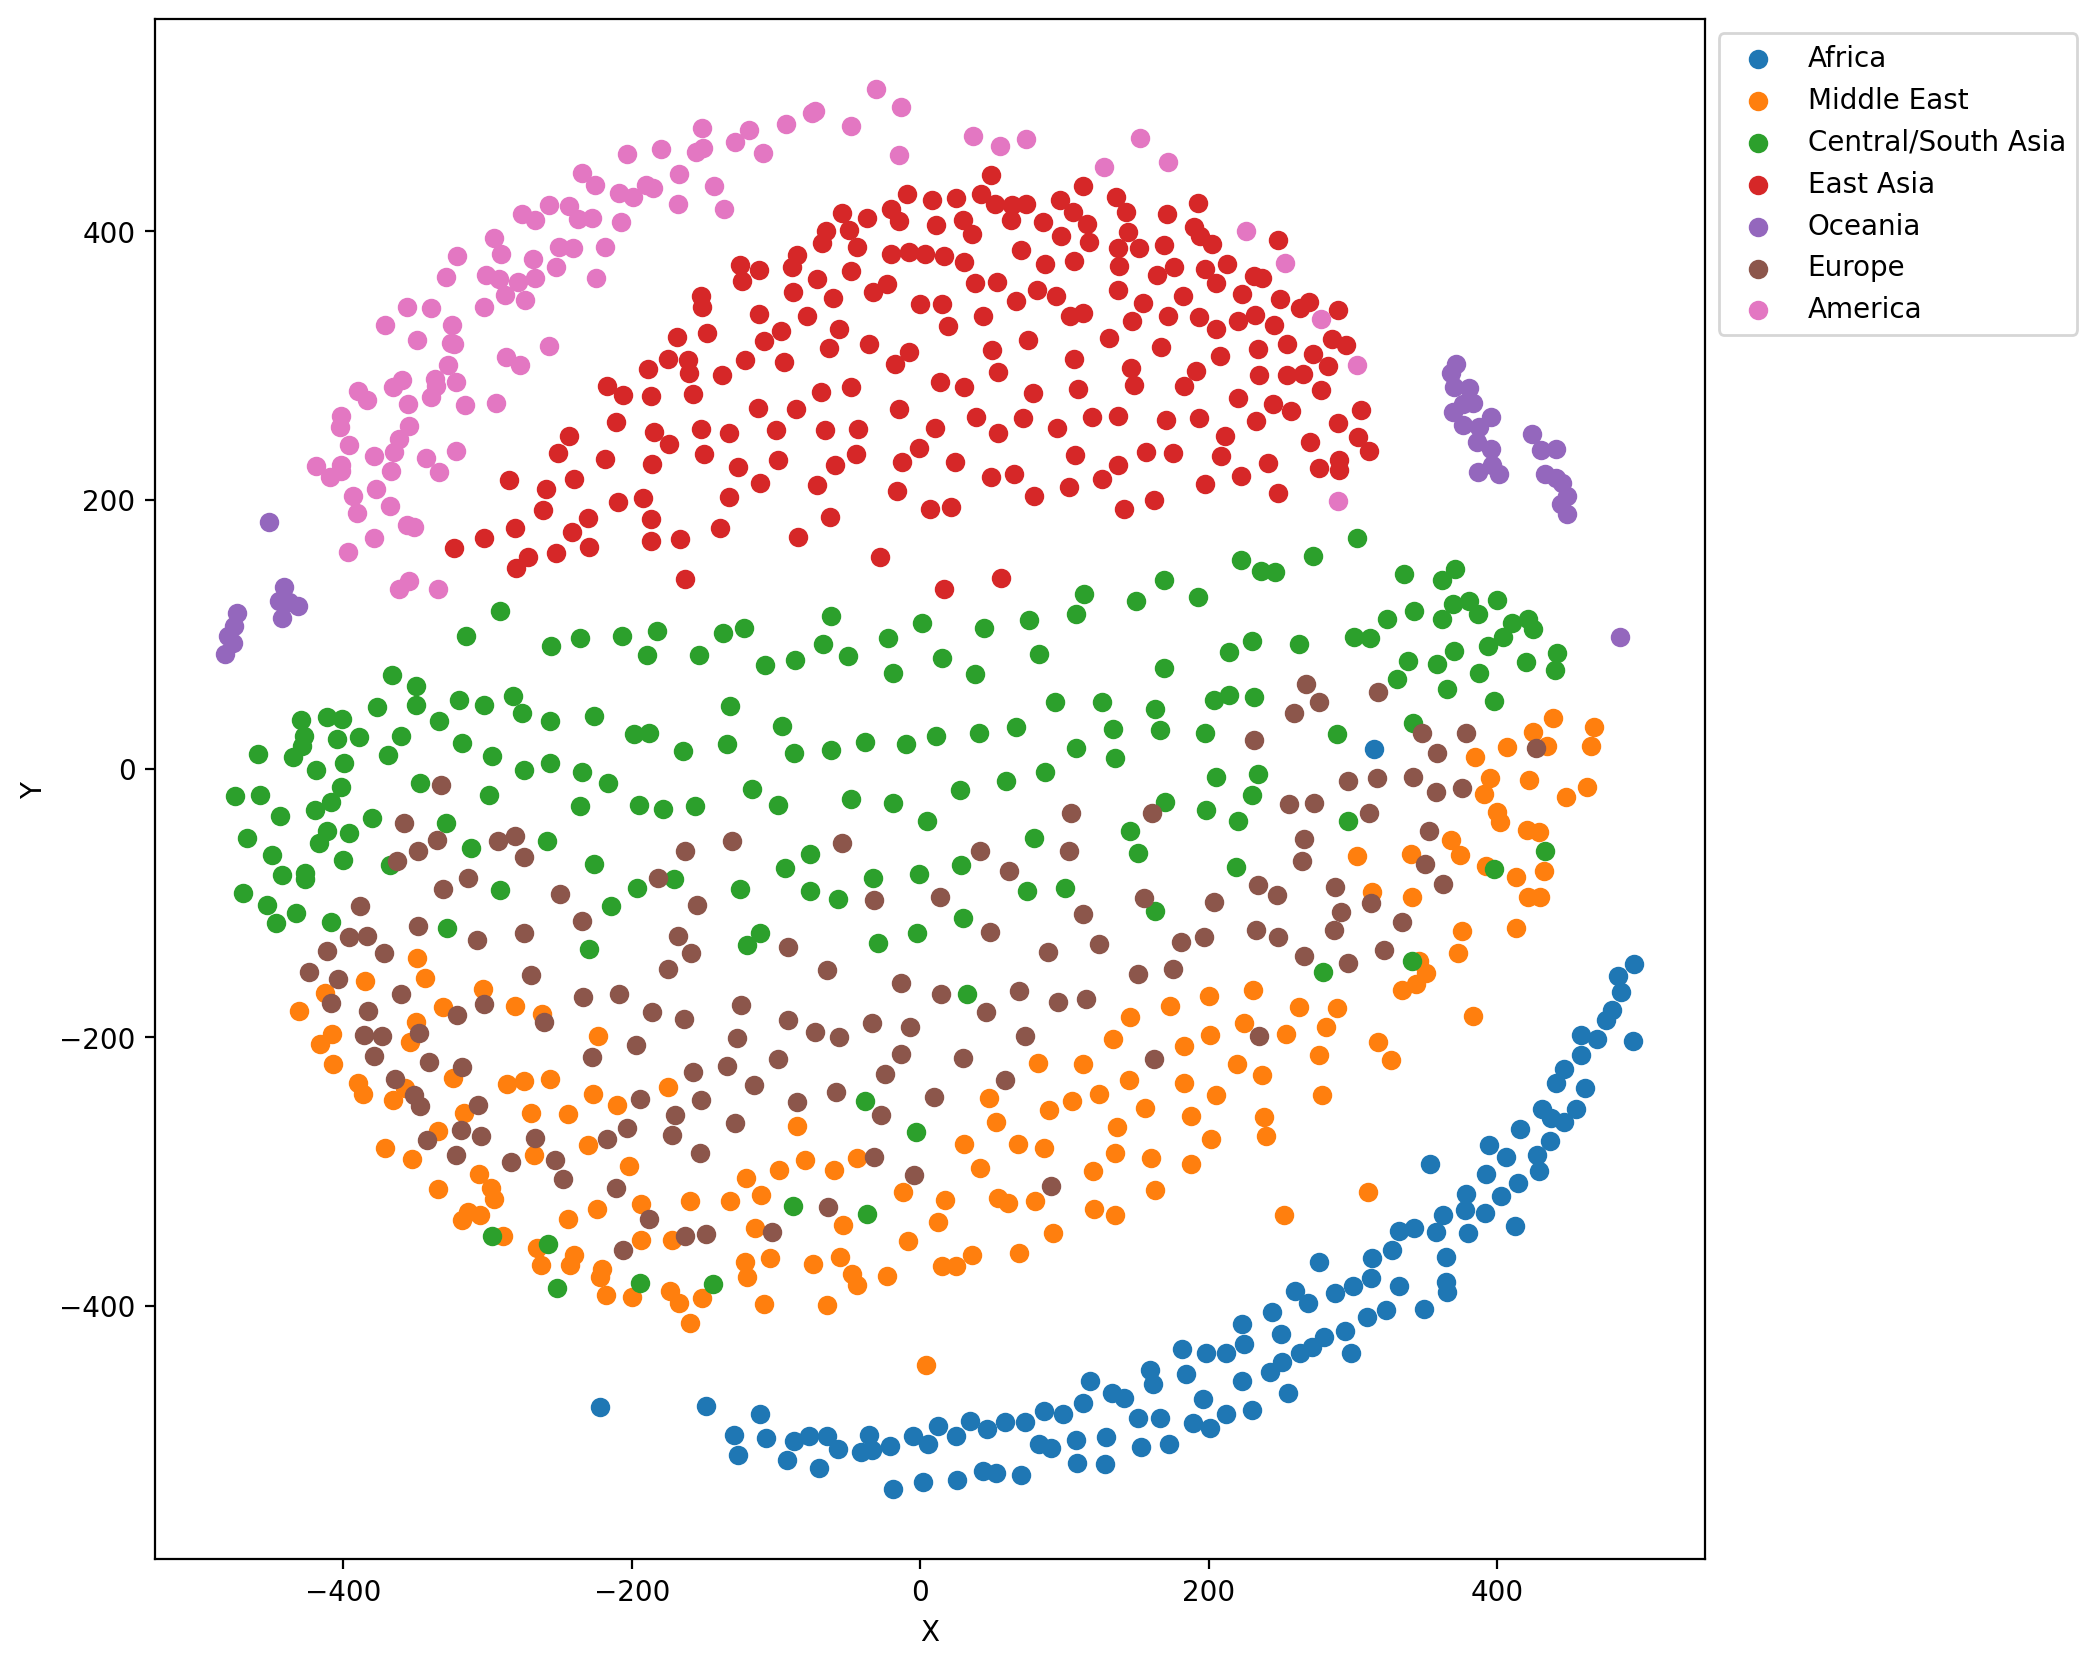

In [160]:
plot_all(mds_result)

## tSNE

In [134]:
from sklearn.manifold import TSNE

In [135]:
tsne = TSNE(n_components=2, init="pca")
tsne_result = tsne.fit_transform(train_data)

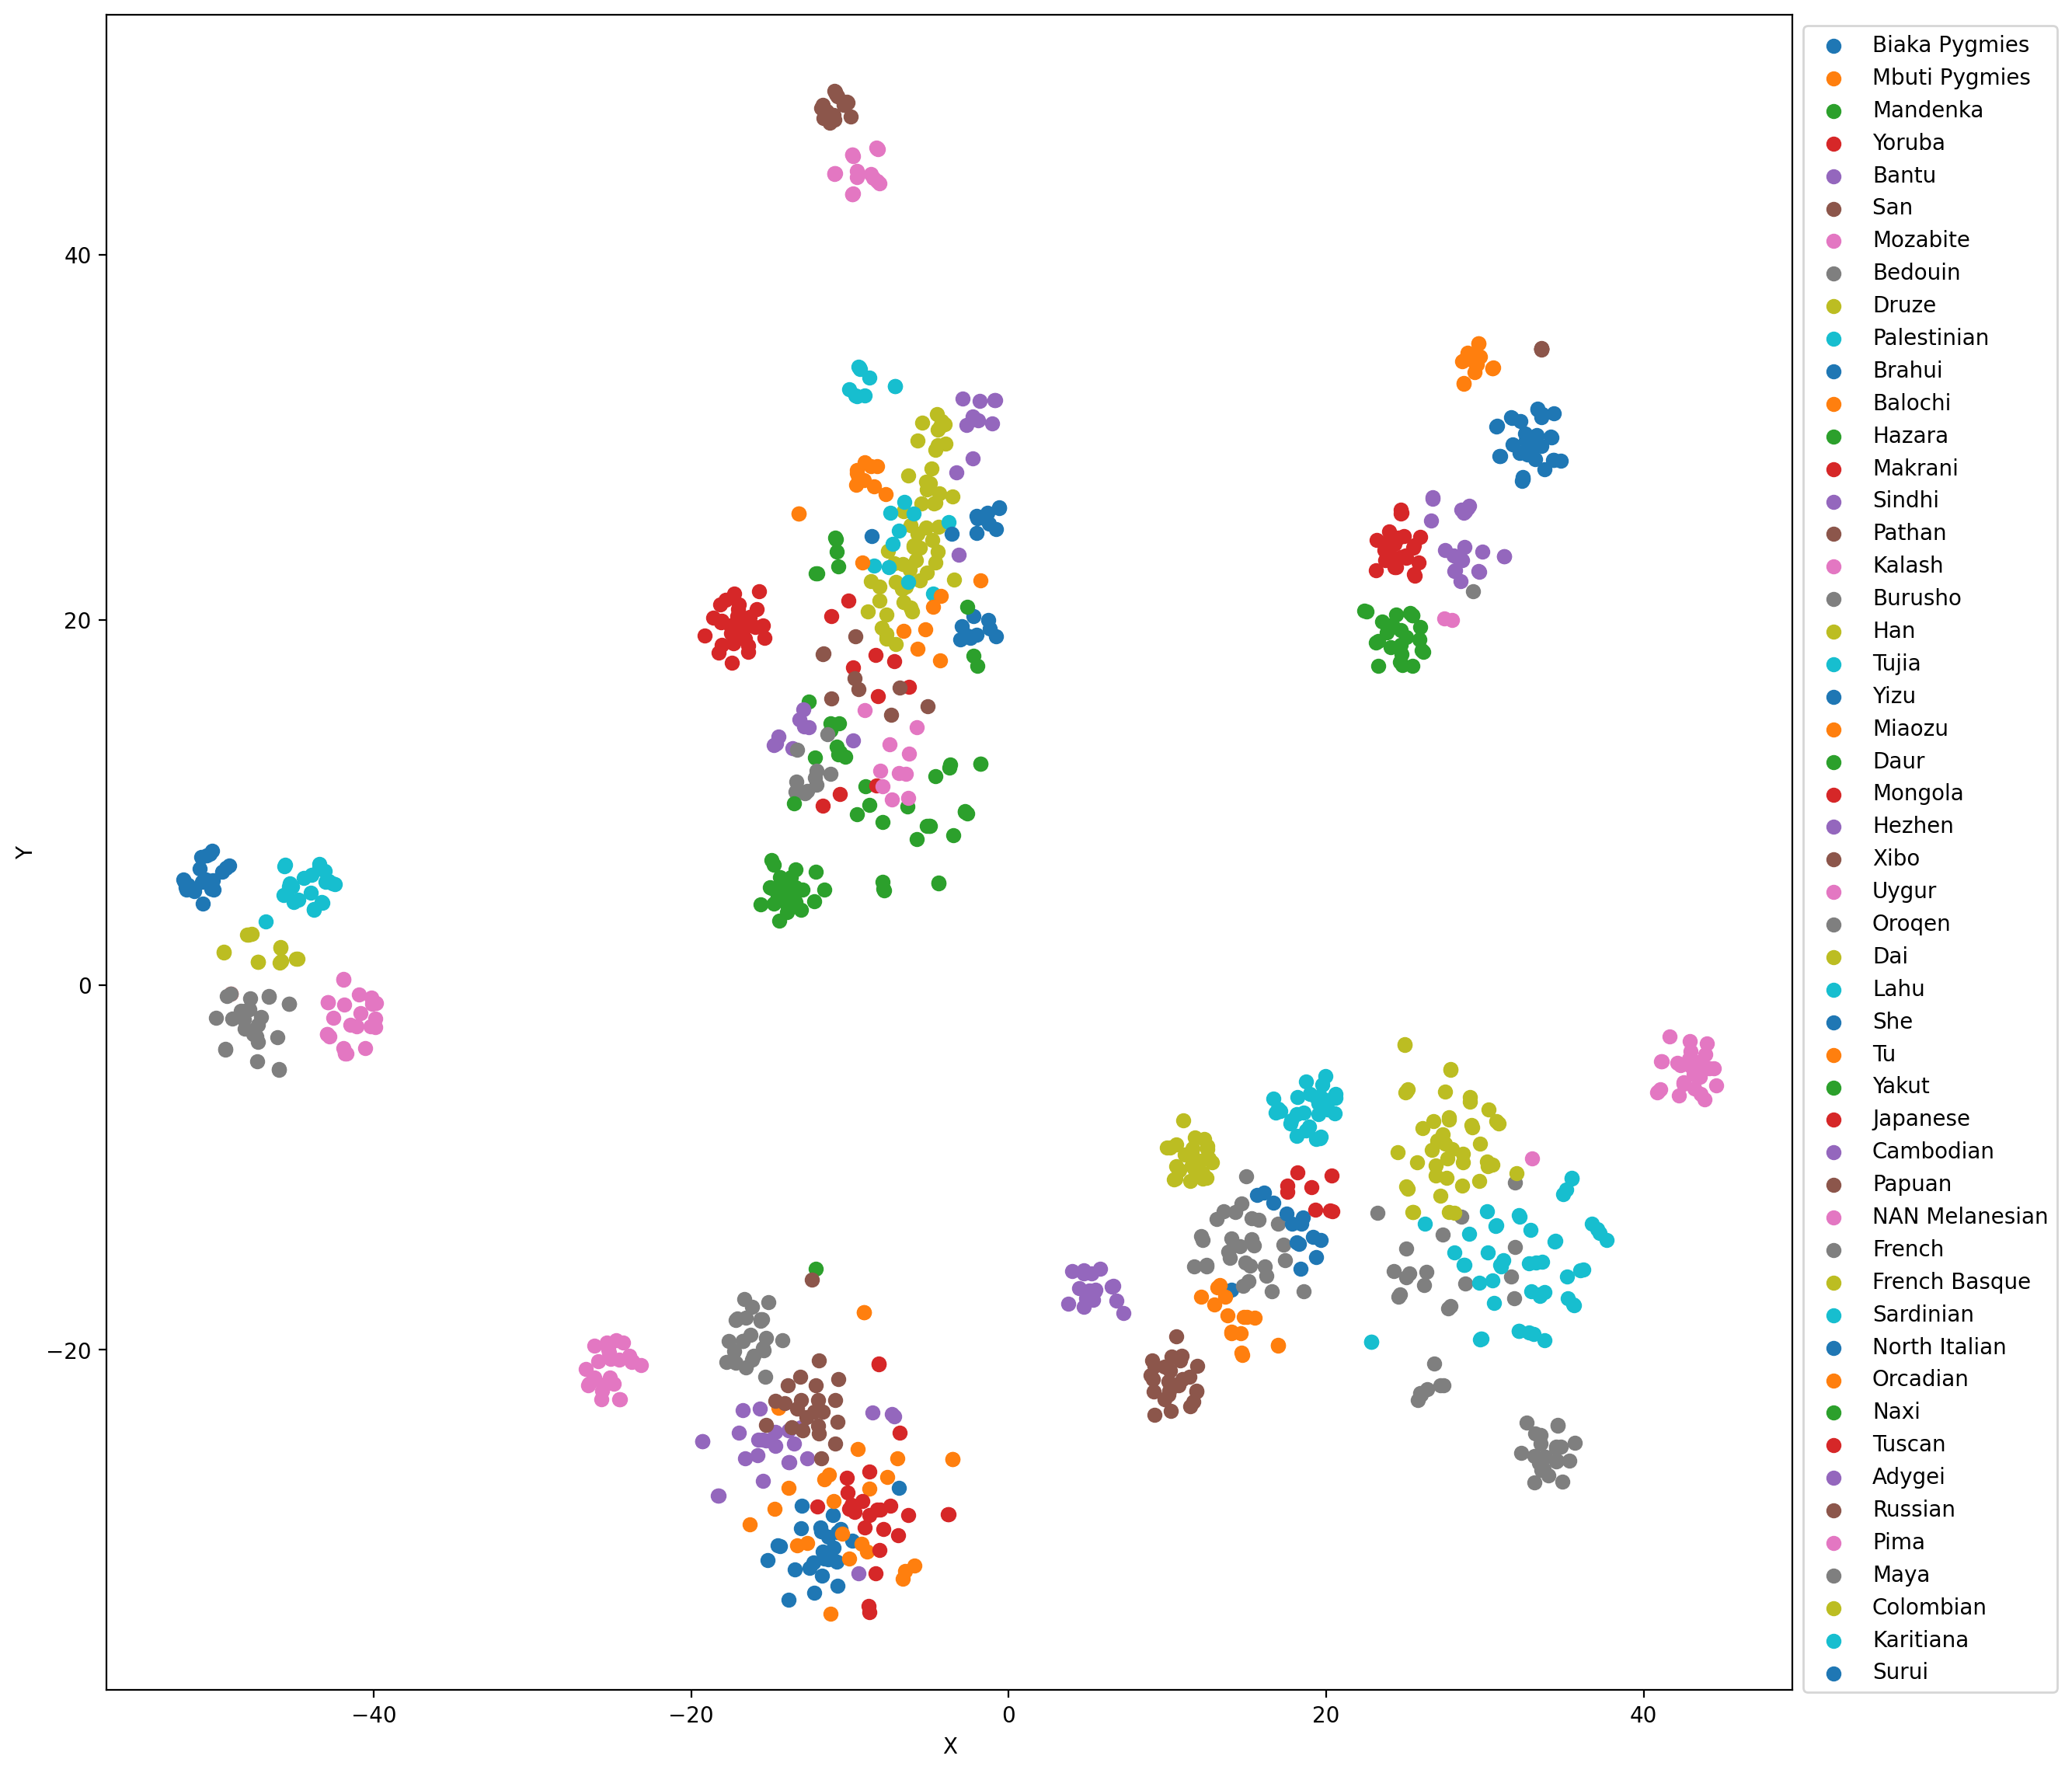

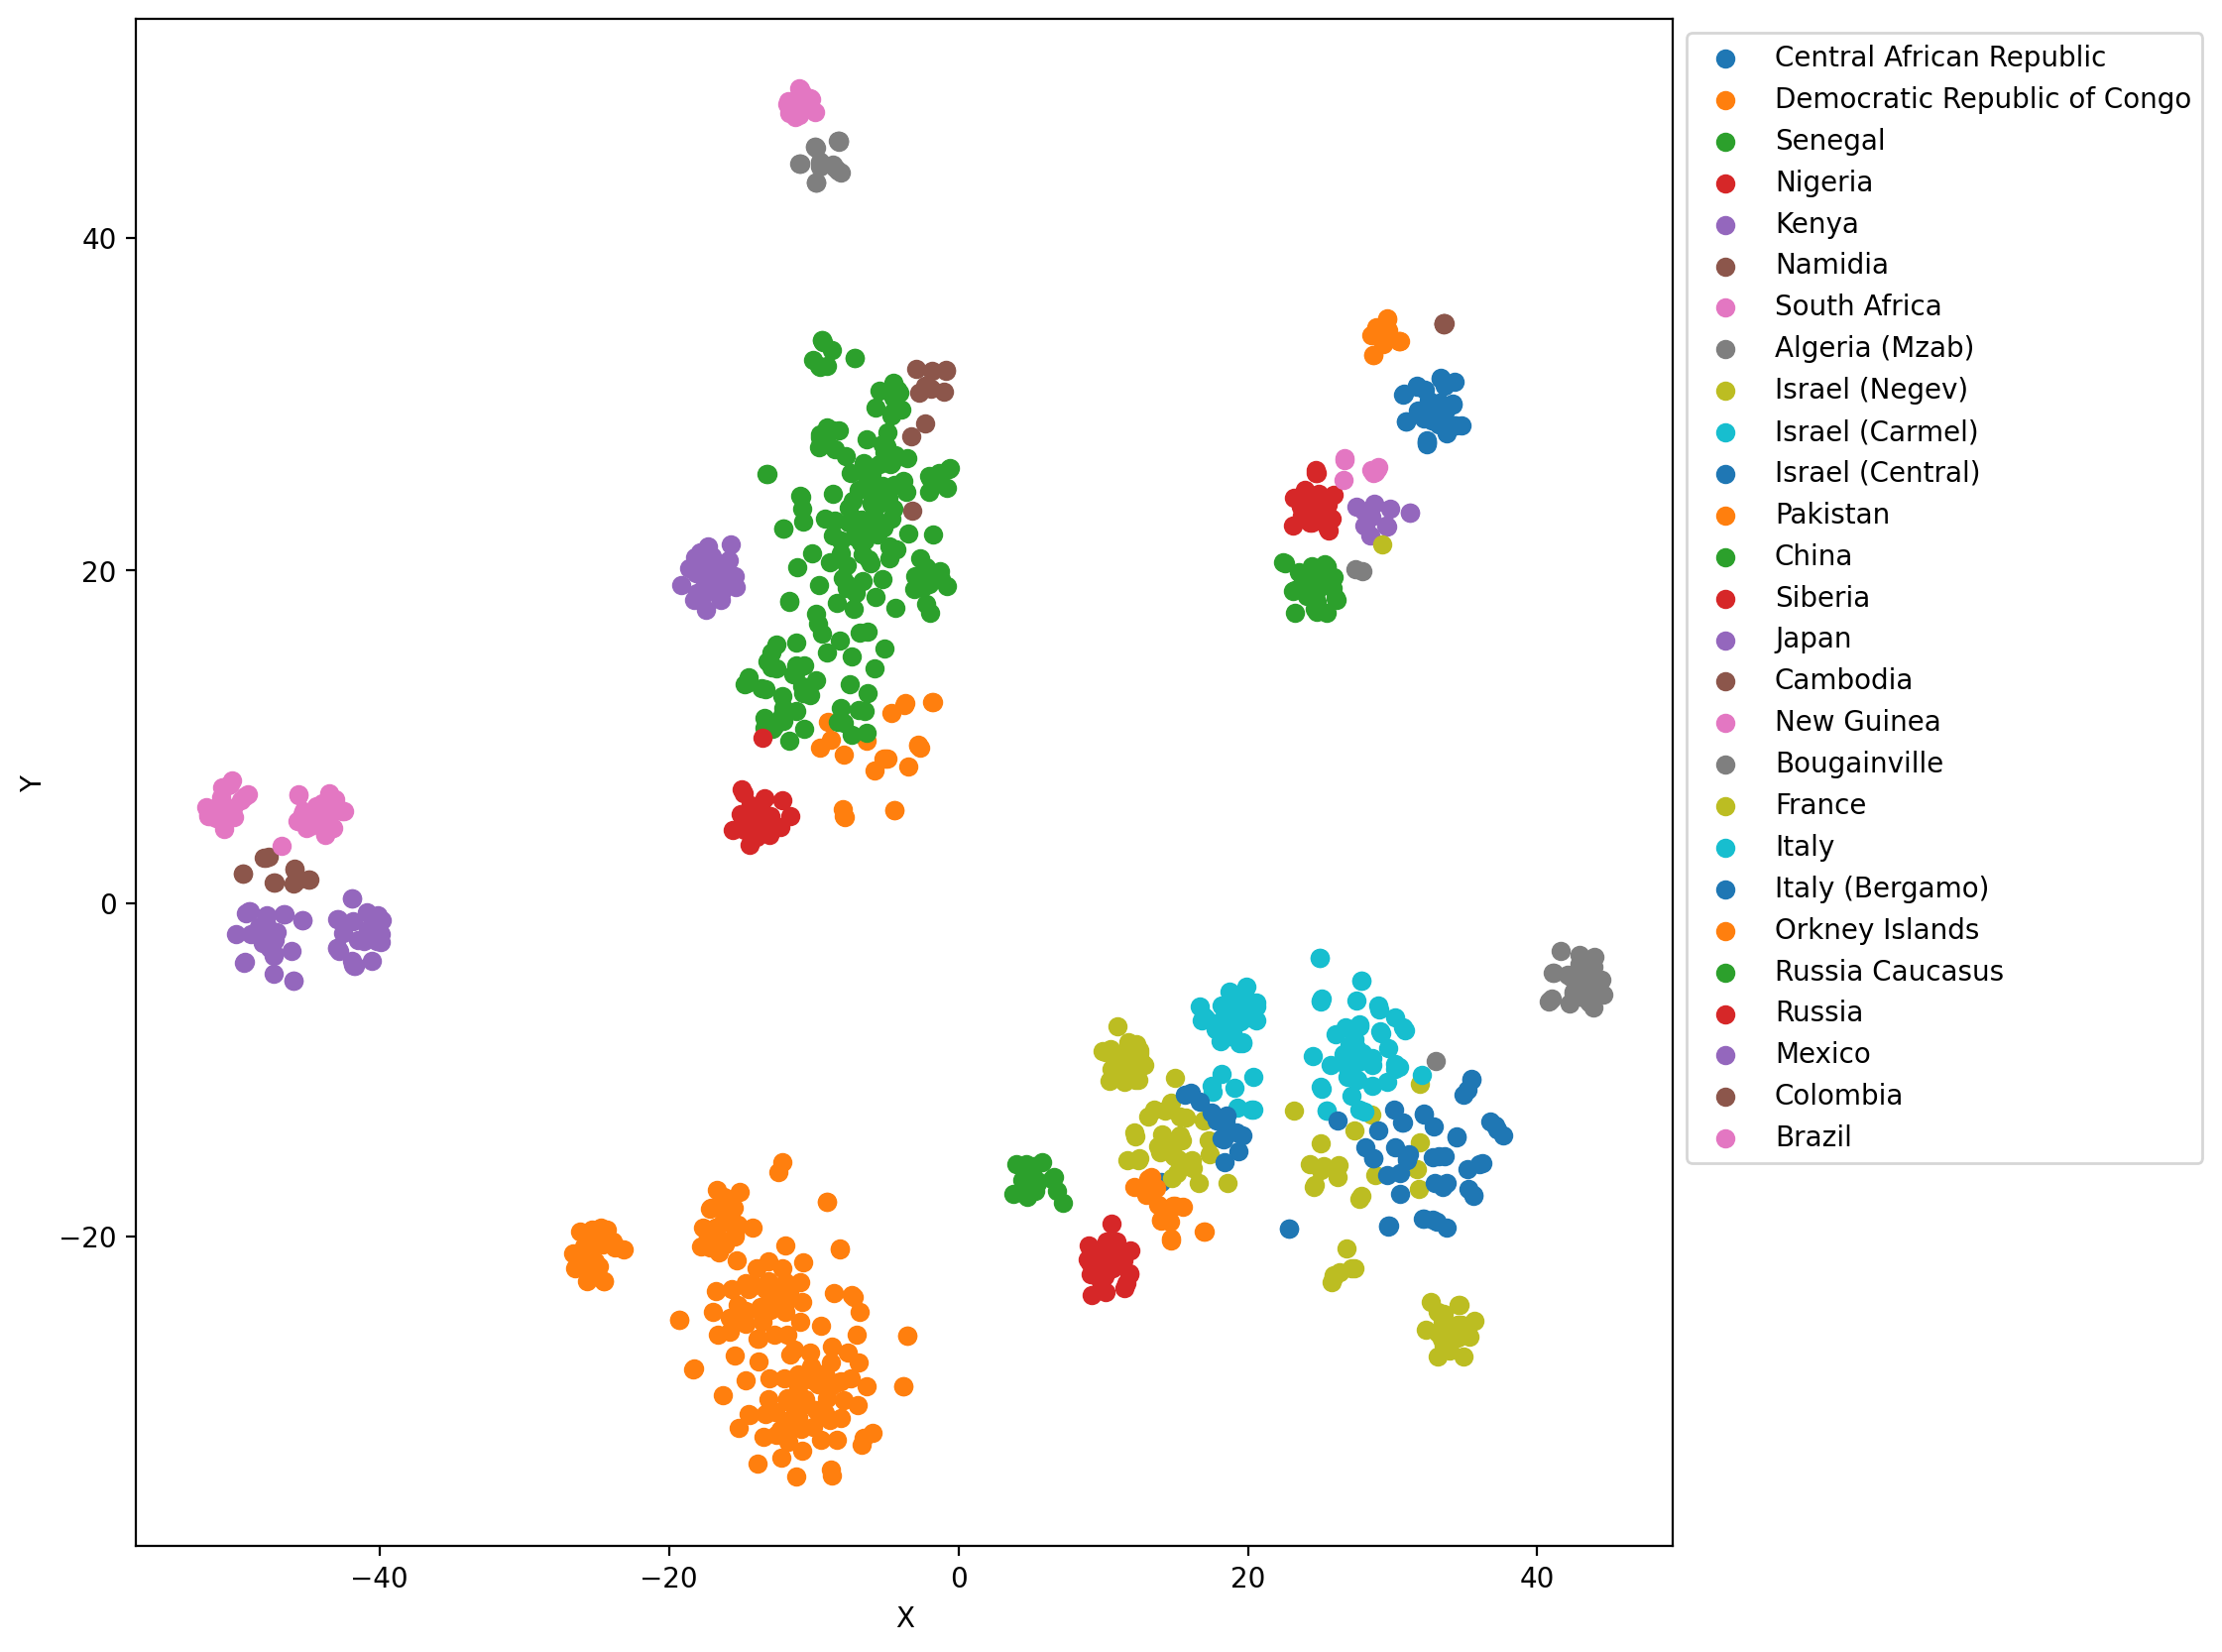

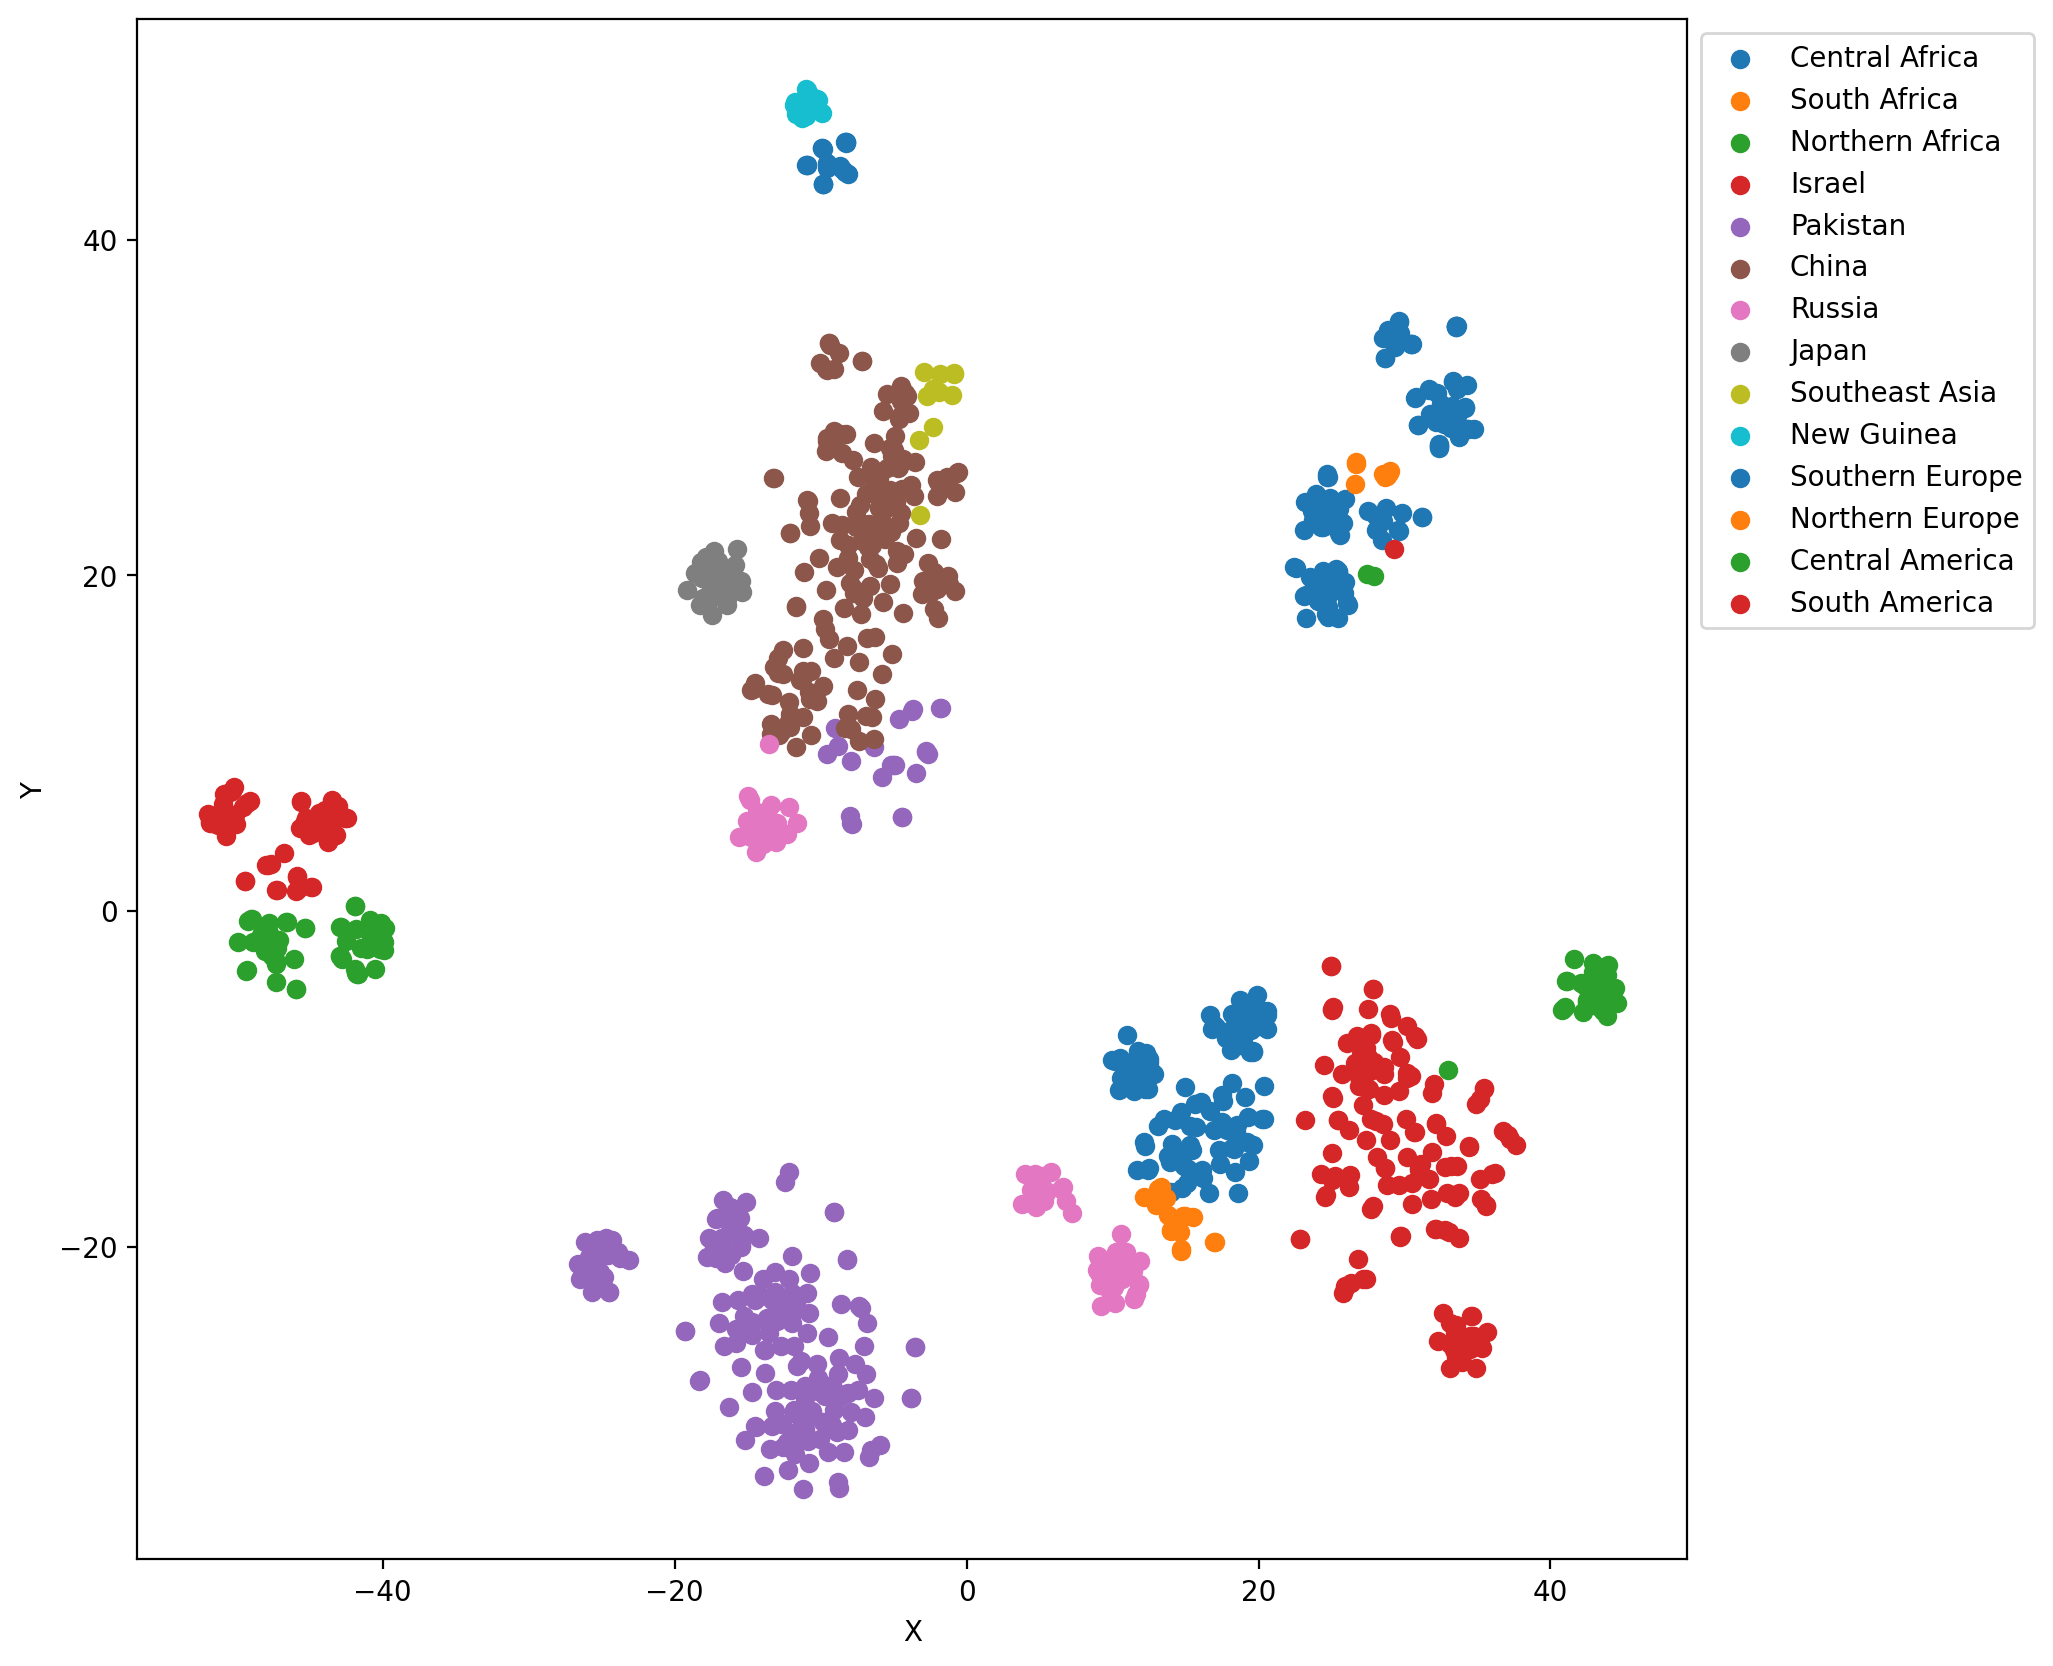

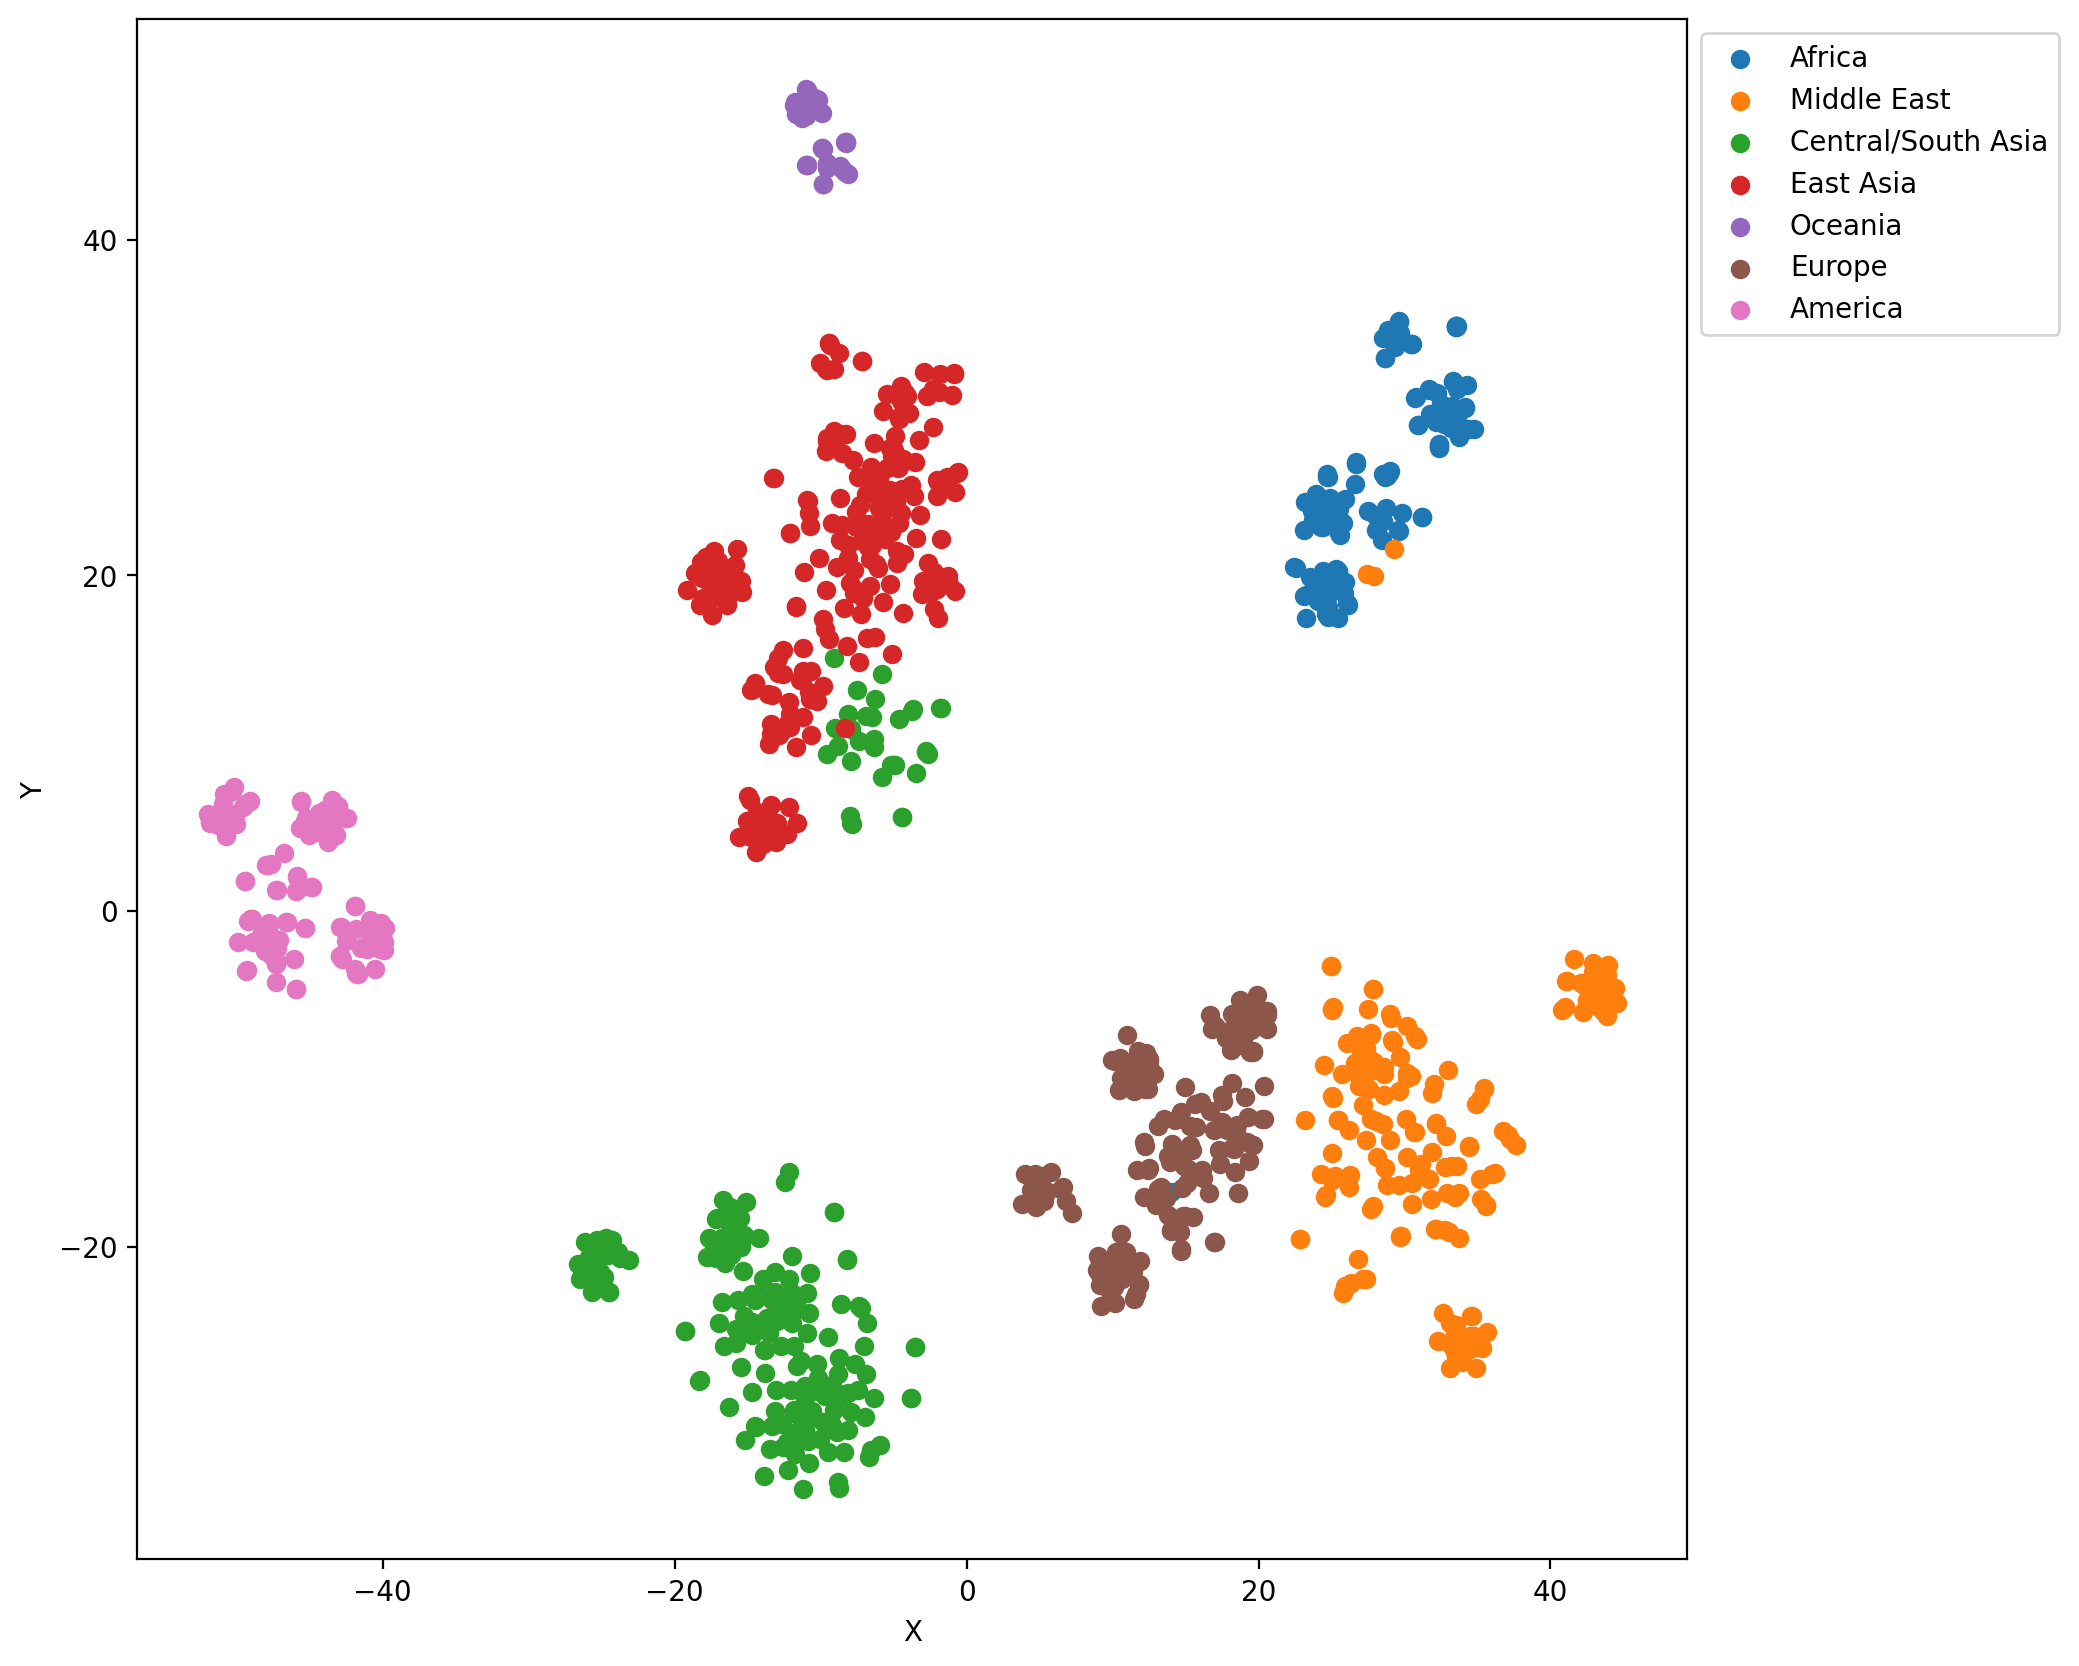

In [161]:
plot_all(tsne_result)

## Parallel Analysis

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

normalized_train_data = (train_data-train_data.mean())/train_data.std()

pca = PCA(train_data.shape[0]-1)
pca.fit(normalized_train_data)
data_result = pca.transform(normalized_train_data)

random_eigenvalues = np.zeros(train_data.shape[0]-1)
for i in range(100):
    random_train_data = pd.DataFrame(np.random.normal(0, 1, [train_data.shape[0], train_data.shape[1]]))
    pca_random = PCA(train_data.shape[0]-1)
    pca_random.fit(random_train_data)
    random_data_result = pca_random.transform(random_train_data)
    random_eigenvalues = random_eigenvalues+pca_random.explained_variance_ratio_
random_eigenvalues = random_eigenvalues / 100

plt.plot(pca.explained_variance_ratio_, '--bo', label='pca-data')
plt.plot(random_eigenvalues, '--rx', label='pca-random')
plt.legend()
plt.title('parallel analysis plot')
plt.show()